# 1. Business Understanding
### 1.1. Business Context

- Agency mengelola performa digital advertising dari berbagai klien dan industri.

- Manajemen membutuhkan evaluasi efektivitas campaign untuk meningkatkan profit dan efisiensi budget.

### 1.2. Problem Statement

- Bagaimana performa iklan secara keseluruhan berdasarkan metrik utama digital marketing?

- Faktor apa yang paling mempengaruhi revenue dan efektivitas campaign?

- Bagaimana strategi optimasi budget yang dapat meningkatkan profit perusahaan?

### 1.3. Analytical Questions

- Bagaimana performa CTR, Purchase Value, dan ROAS secara keseluruhan?

- Bagaimana perbedaan performa berdasarkan campaign objective, industri, dan akun?

- Apakah terdapat tren waktu atau pola musiman yang mempengaruhi performa iklan?

- Pada bagian funnel mana potensi bottleneck terjadi?

### 1.4. Hypothesis (Key Takeaways)

- Campaign dengan objective Sales menghasilkan ROAS lebih tinggi dibanding Traffic.

- Industri tertentu memiliki conversion rate lebih tinggi.

- Performa iklan dipengaruhi seasonality tertentu.

- Pengeluaran iklan yang lebih besar tidak selalu menghasilkan revenue lebih tinggi.

### 1.5. Success Metrics

- CTR sebagai indikator engagement

- Conversion Rate sebagai indikator efektivitas funnel

- ROAS sebagai indikator profitabilitas

- Purchase Value sebagai indikator revenue

# 2. Data Understanding

## 2.1. Dataset Overview

### Deskripsi dataset
Dataset yang digunakan berisi data performa digital advertising dari beberapa akun klien yang dikelola oleh sebuah digital marketing agency. Setiap baris data merepresentasikan **performa 1 campaign per hari untuk satu akun klien** tertentu.

Dataset ini juga menyediakan metrik yang menggambarkan seluruh funnel pemasaran digital, mulai dari jangkauan audiens, interaksi pengguna, hingga konversi transaksi dan revenue yang dihasilkan. Informasi tersebut memungkinkan analisis efektivitas campaign secara komprehensif dalam menilai performa bisnis.

### Struktur kolom dan keterangannya
- `created_date`: Tanggal campaign
- `account_name`: Nama klien
- `campaign_objective`: Objective campaign (Traffic / Sales)
- `impressions`: Jumlah tayangan iklan
- `reach`: Jumlah user unik
- `clicks`: Total klik
- `link_clicks`: Klik ke website
- `content_views`: View konten
- `add_to_cart`: Jumlah add to cart
- `purchase`: Jumlah transaksi
- `purchase_value`: Total revenue
- `amount_spent`: Total biaya iklan

### Jumlah observasi
Dataset terdiri dari **4.380 observasi dengan 12 variabel**.

### Rentang waktu
Data ini mencakup periode satu tahun penuh, yaitu dari **1 Januari 2023 hingga 31 Desember 2023**. Rentang waktu ini memungkinkan analisis tren performa iklan secara menyeluruh, termasuk identifikasi perubahan performa dari waktu ke waktu maupun potensi pola musiman

### Jumlah Industri
Dataset memuat data dari **6 akun klien yang berasal dari 3 industri berbeda**, yaitu Fashion, Beauty, dan FMCG dengan distribusi data yang seimbang pada masing-masing industri, yaitu berjumlah **1460 per industri**.

### Keterbatasan data
Data hanya mencakup performa iklan tanpa menyertakan faktor eksternal seperti kondisi pasar, strategi kreatif konten, maupun karakteristik target audiens yang dapat memengaruhi performa campaign. Selain itu, dataset tidak menyediakan **detail platform iklan** sehingga analisis performa lintas platform tidak dapat dilakukan.

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
df = pd.read_csv('Data Ads.csv')
df

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2023-12-31,Client D - Beauty,Sales,547111.5,151032.0,46618.5,71763.0,9906.0,496.5,1218.0,5797660.5,515062.5
4376,2023-12-31,Client E - FMCG,Traffic,1361877.0,722730.0,30322.5,39778.5,0.0,0.0,0.0,0.0,3888375.0
4377,2023-12-31,Client E - FMCG,Sales,1083837.0,148594.5,76465.5,45249.0,4192.5,1179.0,652.5,4263457.5,5211208.5
4378,2023-12-31,Client F - FMCG,Traffic,509106.0,180396.0,141784.5,10150.5,0.0,0.0,0.0,0.0,791860.5


In [ ]:
# Mengecek rentang waktu dataset
print("Tanggal awal:", df['created_date'].min())
print("Tanggal akhir:", df['created_date'].max())

# Mengecek jumlah akun klien
print("Jumlah akun klien:", df['account_name'].nunique())

Tanggal awal: 2023-01-01
Tanggal akhir: 2023-12-31
Jumlah akun klien: 6


In [ ]:
# Membuat kolom industri dari account_name
df['industry'] = df['account_name'].str.split(' - ').str[1]
df[['account_name','industry']]

,account_name,industry
0,Client A - Fashion,Fashion
1,Client A - Fashion,Fashion
2,Client B - Beauty,Beauty
3,Client B - Beauty,Beauty
4,Client C - Fashion,Fashion
...,...,...
4375,Client D - Beauty,Beauty
4376,Client E - FMCG,FMCG
4377,Client E - FMCG,FMCG
4378,Client F - FMCG,FMCG


In [ ]:
# Distribusi industri
df['industry'].value_counts()

,count
industry,
Fashion,1460
Beauty,1460
FMCG,1460


## 2.2. Data structure

### Informasi data
Dataset terdiri dari 4.380 baris data dengan 13 variabel yang merepresentasikan performa campaign iklan harian.

Tipe Variabel:
- Datetime
  - `created_date` → tanggal campaign dijalankan.
- Kategorikal
  - `account_name` → nama klien.
  - `campaign_objective` → tujuan campaign (Traffic / Sales).
  - `industry` → sektor bisnis klien.
- Numerik (Performance Metrics)
  - Awareness & Exposure → `impressions`, `reach`
  - Engagement → `clicks`, `link_clicks`, `content_views`
  - Conversion → `add_to_cart`, `purchase`
  - Business Outcome → `purchase_value`, `amount_spent`

Kualitas Data
- Tidak terdapat missing value.
- Tidak ditemukan data duplikat.
- Distribusi data klien dan industri relatif seimbang sehingga memungkinkan perbandingan performa yang objektif.

### Statistik deskriptif
Secara umum, performa campaign menunjukkan variasi yang cukup besar antar campaign.
- Rata-rata campaign menghasilkan sekitar 650 ribu impressions dan 319 ribu reach, menunjukkan jangkauan audiens yang luas.
- Rata-rata campaign menghasilkan sekitar 64 ribu clicks dan 32 ribu link clicks, menunjukkan interaksi pengguna yang cukup tinggi terhadap iklan.
- Pada tahap konversi, rata-rata campaign menghasilkan sekitar 300 transaksi dengan rata-rata revenue sekitar 2,38 juta.
- Nilai minimum pada metrik konversi menunjukkan banyak campaign yang tidak menghasilkan transaksi, yang mengindikasikan adanya perbedaan tujuan campaign atau potensi hambatan konversi.
- Nilai maksimum yang jauh lebih tinggi dibanding median menunjukkan adanya campaign tertentu yang memiliki performa sangat tinggi dibanding campaign lainnya.

### Distribusi data
Distribusi Variabel Numerik (Histogram)
- Mayoritas metrik seperti impressions, reach, clicks, purchase value, dan amount spent memiliki distribusi tidak merata, di mana sebagian besar campaign menghasilkan performa sedang, dan hanya sedikit campaign yang sangat tinggi performanya.
- Metrik bagian bawah funnel (`content_views`, `add_to_cart`, `purchase`) memiliki banyak nilai nol.
  - Banyak campaign tidak menghasilkan aktivitas konversi.
  - Mengindikasikan kemungkinan hambatan pada funnel konversi.
  - Bisa juga menunjukkan sebagian campaign hanya berfokus pada awareness atau traffic.

Hubungan Antar Variabel (Pairplot)
- `clicks` dan `link_clicks`
  - Memiliki hubungan sangat kuat.
  - Ketika pengguna mengklik iklan, kemungkinan besar mereka juga mengklik tautan menuju halaman tujuan.
- `amount_spent` dengan `purchase` dan `purchase_value`
  - Semakin besar pengeluaran iklan, cenderung semakin tinggi jumlah transaksi dan revenue.
  - Perlu dianalisis lebih lanjut untuk melihat efisiensi pengeluaran.
- `purchase` dan `purchase_value`
  - Memiliki hubungan yang sangat kuat.
  - Semakin banyak transaksi, semakin besar revenue yang dihasilkan.

In [ ]:
# Informasi struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   float64
 4   reach               4380 non-null   float64
 5   clicks              4380 non-null   float64
 6   link_clicks         4380 non-null   float64
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   float64
 9   purchase            4380 non-null   float64
 10  purchase_value      4380 non-null   float64
 11  amount_spent        4380 non-null   float64
dtypes: float64(9), object(3)
memory usage: 410.8+ KB


In [ ]:
# Statistik deskriptif variabel numerik
df.describe()

,created_date,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
count,4380,4.380000e+03,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03,4.380000e+03
mean,2023-07-02 00:00:00,6.509784e+05,319465.963721,64658.303105,32284.340525,3270.216758,329.622032,299.895434,2.385893e+06,2.957227e+06
min,2023-01-01 00:00:00,1.003580e+05,50134.000000,10029.000000,5008.000000,0.000000,0.000000,0.000000,0.000000e+00,1.014850e+05
25%,2023-04-02 00:00:00,3.682400e+05,178756.300000,36632.250000,17758.200000,0.000000,0.000000,0.000000,0.000000e+00,1.474532e+06
50%,2023-07-02 00:00:00,6.193560e+05,305107.500000,61225.000000,30892.500000,505.000000,50.000000,5.000000,5.176000e+04,2.856742e+06
75%,2023-10-01 00:00:00,8.774980e+05,428148.125000,86084.450000,43292.750000,6296.150000,630.000000,560.250000,4.531508e+06,4.153663e+06
max,2023-12-31 00:00:00,1.998018e+06,998320.000000,199252.000000,99554.000000,19964.000000,1992.000000,1980.000000,1.590125e+07,9.970642e+06
std,NaN,3.561788e+05,177837.971292,35658.804018,17818.611700,4149.902583,416.383348,401.934926,3.200339e+06,1.858174e+06


In [ ]:
# Statistik seluruh variabel
df.describe(include='all')

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
count,4380,4380,4380,4.380000e+03,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03,4.380000e+03
unique,365,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-12-31,Client A - Fashion,Traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,730,2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.509784e+05,319465.963721,64658.303105,32284.340525,3270.216758,329.622032,299.895434,2.385893e+06,2.957227e+06
std,NaN,NaN,NaN,3.561788e+05,177837.971292,35658.804018,17818.611700,4149.902583,416.383348,401.934926,3.200339e+06,1.858174e+06
min,NaN,NaN,NaN,1.003580e+05,50134.000000,10029.000000,5008.000000,0.000000,0.000000,0.000000,0.000000e+00,1.014850e+05
25%,NaN,NaN,NaN,3.682400e+05,178756.300000,36632.250000,17758.200000,0.000000,0.000000,0.000000,0.000000e+00,1.474532e+06
50%,NaN,NaN,NaN,6.193560e+05,305107.500000,61225.000000,30892.500000,505.000000,50.000000,5.000000,5.176000e+04,2.856742e+06
75%,NaN,NaN,NaN,8.774980e+05,428148.125000,86084.450000,43292.750000,6296.150000,630.000000,560.250000,4.531508e+06,4.153663e+06


In [ ]:
# Mengecek missing value
missing_values = df.isnull().sum()
missing_values

,0
created_date,0
account_name,0
campaign_objective,0
impressions,0
reach,0
clicks,0
link_clicks,0
content_views,0
add_to_cart,0
purchase,0


In [ ]:
# Mengecek jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


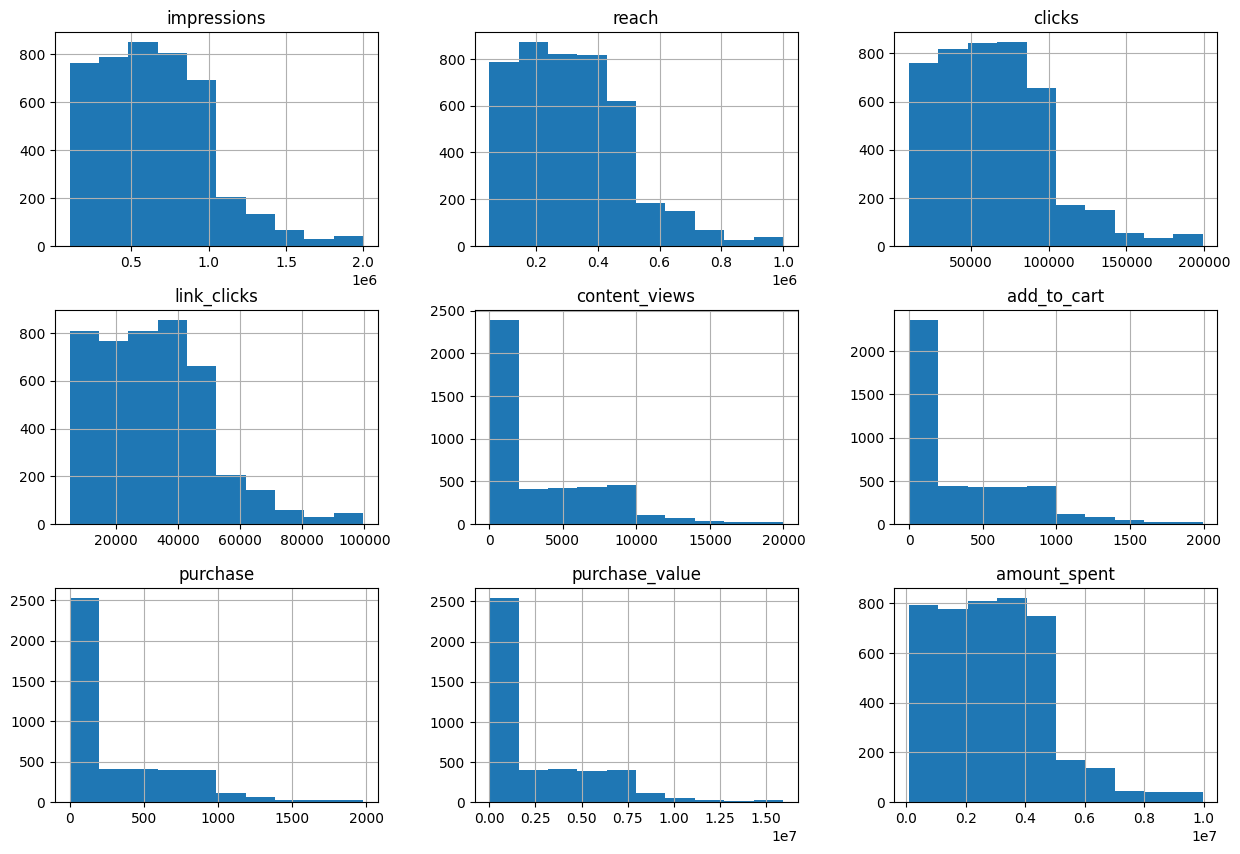

In [ ]:
# Melihat distribusi variabel numerik utama
numeric_cols = [
    'impressions','reach','clicks','link_clicks',
    'content_views','add_to_cart','purchase',
    'purchase_value','amount_spent'
]

df[numeric_cols].hist(figsize=(15,10))
plt.show()

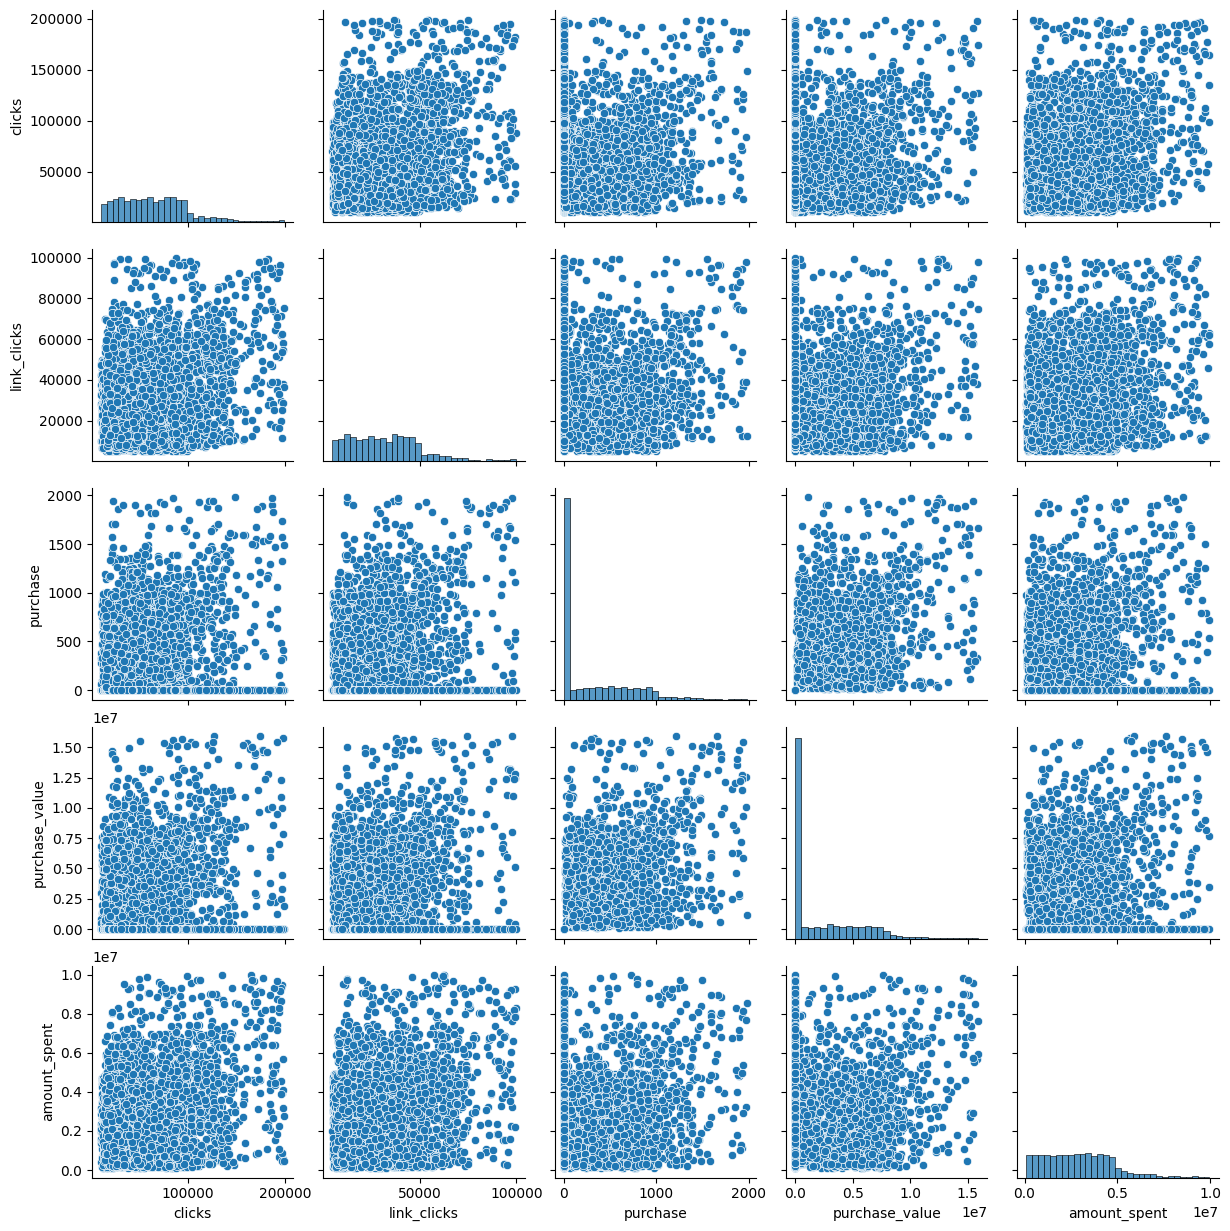

In [ ]:
# Melihat hubungan awal antar metrik utama
sns.pairplot(df[['clicks','link_clicks','purchase','purchase_value','amount_spent']])
plt.show()

# 3. Data Preparation

Tahap **Data Preparation** bertujuan memastikan data siap dianalisis
dengan cara memeriksa kualitas data, memperbaiki format variabel,
serta menambahkan fitur turunan yang dapat membantu analisis performa campaign.

## 3.1. Data Cleaning

Data Cleaning dilakukan untuk memastikan tidak ada kesalahan struktur,
missing value, data duplikat, atau format variabel yang tidak sesuai. Tahap ini juga memastikan tidak ada error logika pada data yang dapat merusak analisis KPI.

In [ ]:
# Copy dataset agar data asli tetap aman
df_prep = df.copy()

# --- Mengecek Missing Value ---
missing_values = df_clean.isnull().sum()
print("Missing Values:")
print(missing_values)

# --- Mengecek Data Duplikat ---
duplicate_rows = df_clean.duplicated().sum()
print("\nJumlah Data Duplikat:", duplicate_rows)

# --- Konversi Tipe Data ---
df_clean['created_date'] = pd.to_datetime(df_clean['created_date'])

# --- Alasan Cleaning ---
if missing_values.sum() == 0 and duplicate_rows == 0:
    print("\nTidak diperlukan proses pembersihan data lanjutan karena data sudah bersih.")

Missing Values:
created_date          0
account_name          0
campaign_objective    0
impressions           0
reach                 0
clicks                0
link_clicks           0
content_views         0
add_to_cart           0
purchase              0
purchase_value        0
amount_spent          0
dtype: int64

Jumlah Data Duplikat: 0

Tidak diperlukan proses pembersihan data lanjutan karena data sudah bersih.


In [ ]:
df_prep = df_clean.copy()

# Menghapus data yang secara logika tidak valid
df_prep = df_prep[
    (df_prep['clicks'] <= df_prep['impressions']) &
    (df_prep['purchase'] <= df_prep['clicks'])
]

print("Jumlah data setelah logical cleaning:", len(df_prep))
df_prep

Jumlah data setelah logical cleaning: 4380


,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2023-12-31,Client D - Beauty,Sales,547111.5,151032.0,46618.5,71763.0,9906.0,496.5,1218.0,5797660.5,515062.5
4376,2023-12-31,Client E - FMCG,Traffic,1361877.0,722730.0,30322.5,39778.5,0.0,0.0,0.0,0.0,3888375.0
4377,2023-12-31,Client E - FMCG,Sales,1083837.0,148594.5,76465.5,45249.0,4192.5,1179.0,652.5,4263457.5,5211208.5
4378,2023-12-31,Client F - FMCG,Traffic,509106.0,180396.0,141784.5,10150.5,0.0,0.0,0.0,0.0,791860.5


Data tersebut dihapus karena melanggar logika dasar funnel marketing, bukan karena tidak relevan dengan soal lomba. Hal ini dikarenaka menyangkut validitas metrik CTR, conversion, dan ROAS yang diminta di guidebook.

#### 1. Kenapa kondisi itu dianggap tidak valid secara logika bisnis

Dalam digital marketing, funnel selalu mengikuti urutan:

Impressions → Clicks → Purchase

Secara teori:
- **Click tidak mungkin lebih besar dari Impression** karena user harus melihat iklan dulu sebelum klik
- **Purchase tidak mungkin lebih besar dari Click** karena user harus klik dulu sebelum transaksi

Kalau kondisi ini terjadi, biasanya menandakan:
- Data tracking error
- Double counting
- Aggregation error
- Data integration antar platform tidak sinkron

#### 2. Kenapa hal ini berbahaya jika tidak dibersihkan

Kalau data tersebut dibiarkan:
- CTR bisa menjadi >100%
- CTR = Click / Impression
- Kalau click > impression → CTR jadi tidak realistis

Ini akan membuat jawaban pertanyaan: "Berapa nilai CTR secara keseluruhan?"
menjadi bias dan tidak valid.

**ROAS bisa ikut bias**

Jika purchase overcounted, maka revenue akan terlalu besar → ROAS tampak lebih bagus dari kondisi sebenarnya.

Ini berbahaya karena guidebook menekankan bahwa, "Memberikan insight berbasis data untuk mendukung keputusan bisnis."

Kalau datanya bias, maka rekomendasi bisnis juga salah arah.

## 3.2. Feature Engineering

Feature Engineering dilakukan untuk membuat metrik performa baru/metrik bisnis yang lebih representatif untuk analisis profit dan funnel detail.

In [ ]:
# --- CTR (Click Through Rate) ---
df_clean['CTR'] = df_clean['clicks'] / df_clean['impressions']

# --- Link CTR ---
df_clean['Link_CTR'] = df_clean['link_clicks'] / df_clean['impressions']

# --- Conversion Rate ---
df_clean['Conversion_Rate'] = df_clean['purchase'] / df_clean['clicks']

# --- Cost Per Click ---
df_clean['CPC'] = df_clean['amount_spent'] / df_clean['clicks']

# --- Return on Ad Spend ---
df_clean['ROAS'] = df_clean['purchase_value'] / df_clean['amount_spent']

df_clean['industry'] = df_clean['account_name'].str.split(' - ').str[1]

In [ ]:
# Mengganti nilai infinite akibat pembagian nol
df_clean.replace([np.inf, -np.inf], 0, inplace=True)

# Mengganti NaN hasil pembagian nol menjadi 0
df_clean.fillna(0, inplace=True)

In [ ]:
df_output_new_metrics = df_clean[
    [
        'account_name',
        'industry',
        'CTR',
        'Link_CTR',
        'Conversion_Rate',
        'CPC',
        'ROAS'
    ]
]
df_output_new_metrics

,account_name,industry,CTR,Link_CTR,Conversion_Rate,CPC,ROAS
0,Client A - Fashion,Fashion,0.101104,0.016980,0.000000,25.474231,0.000000
1,Client A - Fashion,Fashion,0.213882,0.368129,0.037285,161.924389,0.937173
2,Client B - Beauty,Beauty,0.078333,0.137217,0.000000,56.331864,0.000000
3,Client B - Beauty,Beauty,0.012400,0.034008,0.055136,404.447430,0.800638
4,Client C - Fashion,Fashion,0.036011,0.040923,0.000000,57.504258,0.000000
...,...,...,...,...,...,...,...
4375,Client D - Beauty,Beauty,0.085208,0.131167,0.026127,11.048457,11.256227
4376,Client E - FMCG,FMCG,0.022265,0.029209,0.000000,128.233985,0.000000
4377,Client E - FMCG,FMCG,0.070551,0.041749,0.008533,68.151107,0.818132
4378,Client F - FMCG,FMCG,0.278497,0.019938,0.000000,5.584958,0.000000


In [ ]:
# Metode: Derived Metrics Engineering

# Weighted Metrics
df_prep['CTR'] = df_prep['clicks'] / df_prep['impressions']
df_prep['Conversion_Click_to_Purchase'] = df_prep['purchase'] / df_prep['clicks']
df_prep['Conversion_View_to_Cart'] = df_prep['add_to_cart'] / df_prep['content_views']

# Profit proxy (asumsi margin 30%)
ASSUMED_MARGIN = 0.30
df_prep['estimated_profit'] = df_prep['purchase_value'] * ASSUMED_MARGIN
df_prep['Profit_ROAS'] = df_prep['estimated_profit'] / df_prep['amount_spent']

df_prep.replace([np.inf, -np.inf], np.nan, inplace=True)
df_prep.fillna(0, inplace=True)

In [ ]:
# --- CTR (Click Through Rate) ---
df_prep['CTR'] = df_clean['clicks'] / df_clean['impressions']

# --- Link CTR ---
df_prep['Link_CTR'] = df_clean['link_clicks'] / df_clean['impressions']

# --- Conversion Rate ---
df_prep['Conversion_Rate'] = df_clean['purchase'] / df_clean['clicks']

# --- Cost Per Click ---
df_prep['CPC'] = df_clean['amount_spent'] / df_clean['clicks']

# --- Return on Ad Spend ---
df_prep['ROAS'] = df_clean['purchase_value'] / df_clean['amount_spent']

df_prep['industry'] = df_clean['account_name'].str.split(' - ').str[1]

In [ ]:
df_prep_new_metrics = df_prep[
    [
        'account_name',
        'industry',
        'CTR',
        'Link_CTR',
        'Conversion_Rate',
        'CPC',
        'ROAS'
    ]
]
df_prep_new_metrics

,account_name,industry,CTR,Link_CTR,Conversion_Rate,CPC,ROAS
0,Client A - Fashion,Fashion,0.101104,0.016980,0.000000,25.474231,0.000000
1,Client A - Fashion,Fashion,0.213882,0.368129,0.037285,161.924389,0.937173
2,Client B - Beauty,Beauty,0.078333,0.137217,0.000000,56.331864,0.000000
3,Client B - Beauty,Beauty,0.012400,0.034008,0.055136,404.447430,0.800638
4,Client C - Fashion,Fashion,0.036011,0.040923,0.000000,57.504258,0.000000
...,...,...,...,...,...,...,...
4375,Client D - Beauty,Beauty,0.085208,0.131167,0.026127,11.048457,11.256227
4376,Client E - FMCG,FMCG,0.022265,0.029209,0.000000,128.233985,0.000000
4377,Client E - FMCG,FMCG,0.070551,0.041749,0.008533,68.151107,0.818132
4378,Client F - FMCG,FMCG,0.278497,0.019938,0.000000,5.584958,0.000000


## 3.3. Analisis Outlier

In [ ]:
# Kolom numerik yang akan dianalisis
numeric_cols = [
    'impressions',
    'reach',
    'clicks',
    'link_clicks',
    'content_views',
    'add_to_cart',
    'purchase',
    'purchase_value',
    'amount_spent',
    'CTR',
    'Conversion_Click_to_Purchase',
    'ROAS',
    'Profit_ROAS'
]

# Tempat menyimpan hasil detail dan summary
outlier_detail = []
outlier_summary = {}

In [ ]:
# Perhitungan Outlier (IQR Method)

for col in numeric_cols:
    # ---- Hitung Statistik IQR ----
    Q1 = df_prep[col].quantile(0.25)
    Q2 = df_prep[col].quantile(0.50)   # Median
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # ---- Ambil Titik Outlier ----
    outliers = df_prep[(df_prep[col] < lower_bound) | (df_prep[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

    outlier_detail.append({
        "Metric": col,
        "Q1": Q1,
        "Median": Q2,
        "Q3": Q3,
        "IQR": IQR,
        "Lower_Bound": lower_bound,
        "Upper_Bound": upper_bound,
        "Outlier_Count": len(outliers)
    })

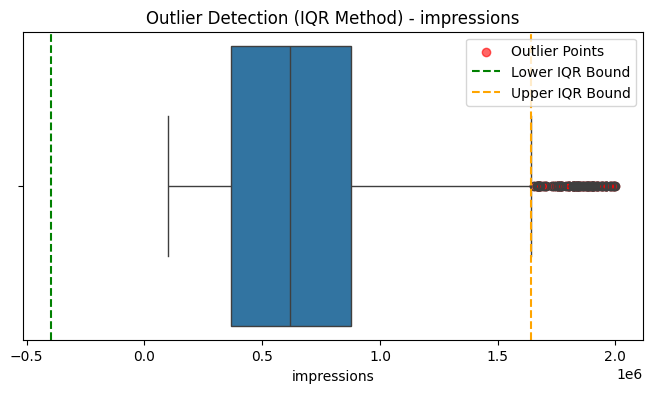

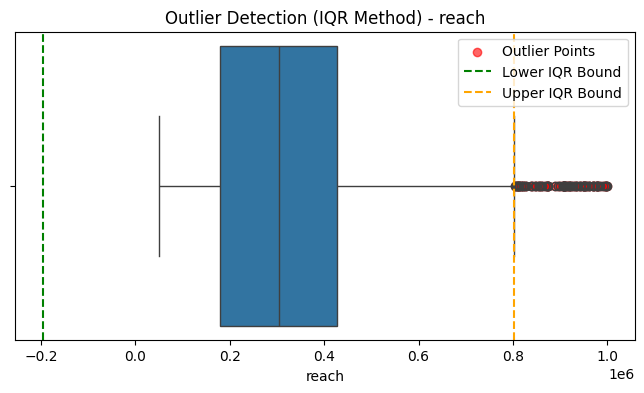

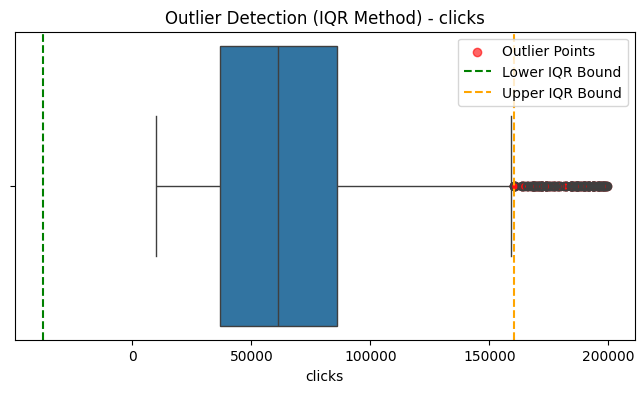

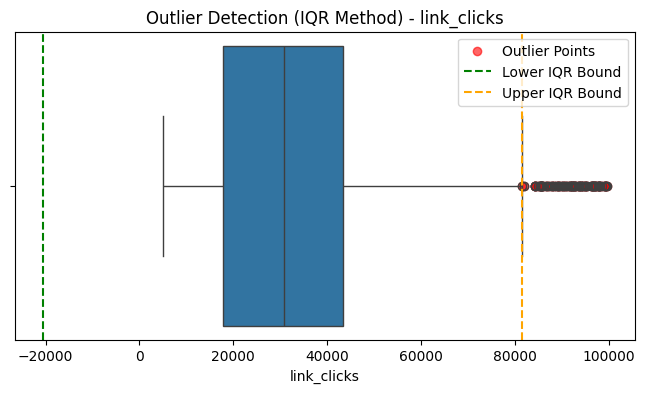

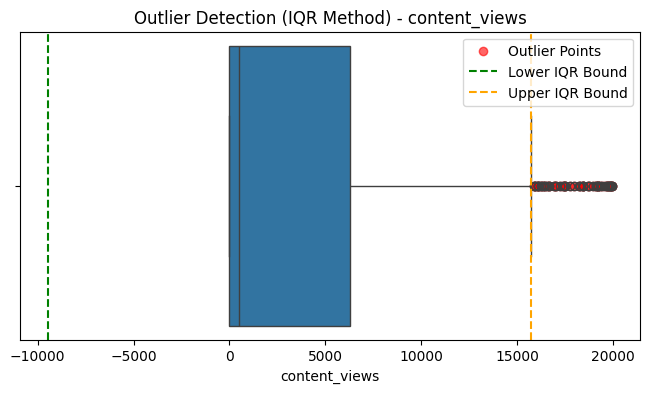

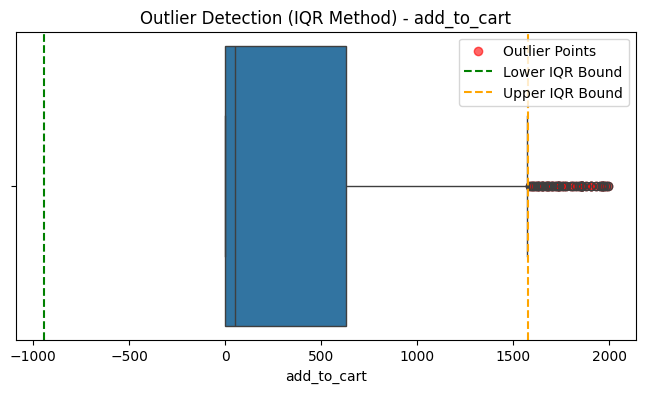

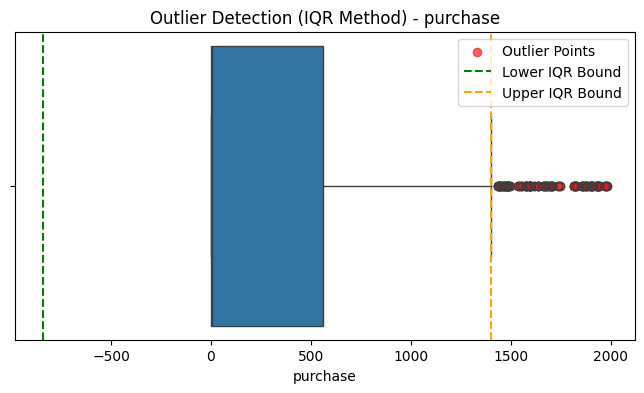

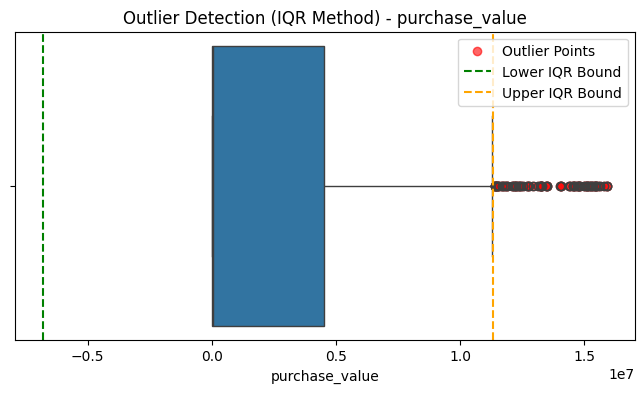

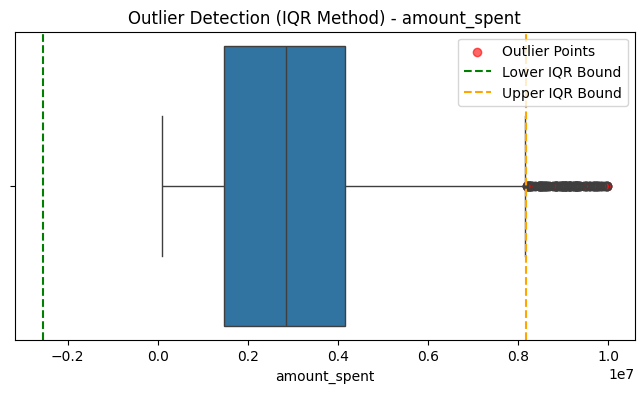

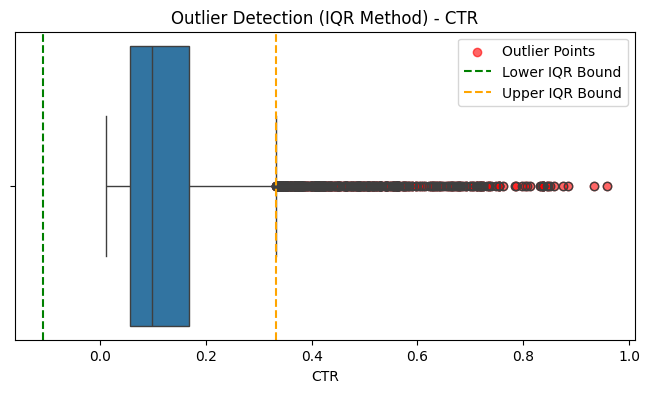

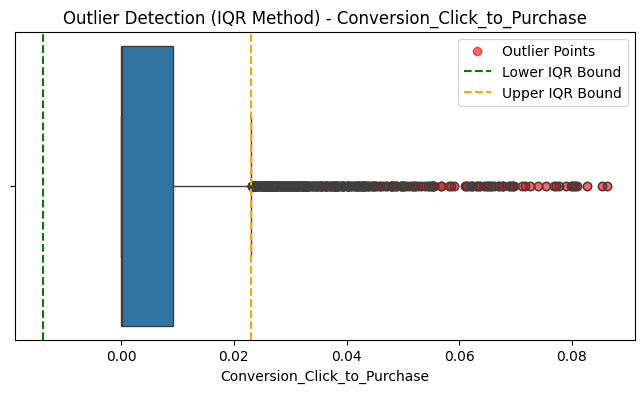

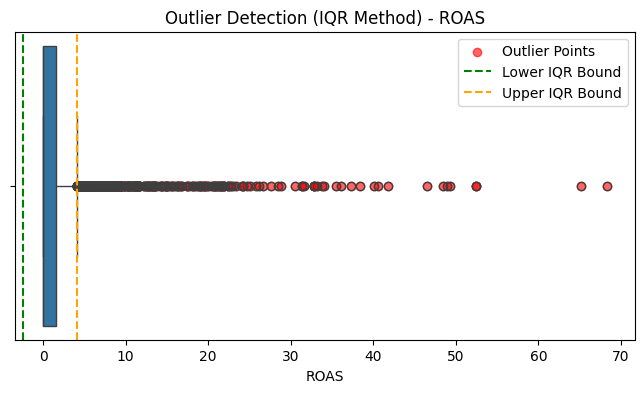

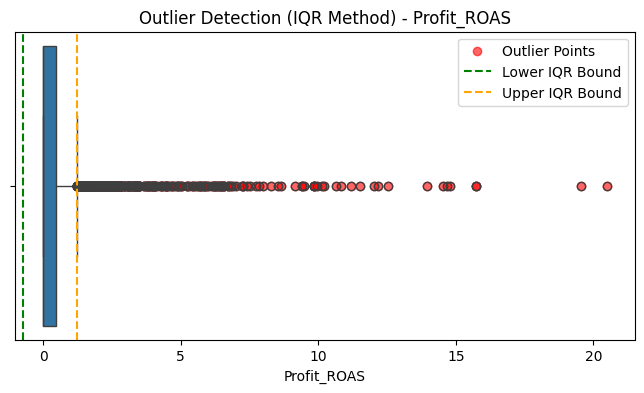

In [ ]:
# Visualisasi Boxplot + Titik Outlier

for col in numeric_cols:

    # Hitung ulang batas IQR (agar lebih jelas untuk visualisasi)
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_prep[(df_prep[col] < lower_bound) | (df_prep[col] > upper_bound)]

    plt.figure(figsize=(8,4))

    # Boxplot
    sns.boxplot(x=df_prep[col])

    # Plot titik outlier eksplisit
    plt.scatter(
        outliers[col],
        np.zeros(len(outliers)),
        alpha=0.6,
        color='red',
        label="Outlier Points"
    )

    # Garis batas IQR
    plt.axvline(lower_bound, linestyle="--", color='green', label="Lower IQR Bound")
    plt.axvline(upper_bound, linestyle="--", color='orange', label="Upper IQR Bound")

    plt.title(f'Outlier Detection (IQR Method) - {col}')
    plt.legend()
    plt.show()

In [ ]:
# Tabel ringkas jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Jumlah Outlier per Kolom:
impressions: 70
reach: 69
clicks: 86
link_clicks: 71
content_views: 49
add_to_cart: 44
purchase: 67
purchase_value: 71
amount_spent: 71
CTR: 378
Conversion_Click_to_Purchase: 312
ROAS: 411
Profit_ROAS: 411


In [ ]:
# Tabel detail
outlier_table = pd.DataFrame(outlier_detail)
display(outlier_table)

,Metric,Q1,Median,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count
0,impressions,3.682400e+05,6.193560e+05,8.774980e+05,5.092580e+05,-3.956470e+05,1.641385e+06,70
1,reach,1.787563e+05,3.051075e+05,4.281481e+05,2.493918e+05,-1.953314e+05,8.022359e+05,69
2,clicks,3.663225e+04,6.122500e+04,8.608445e+04,4.945220e+04,-3.754605e+04,1.602628e+05,86
3,link_clicks,1.775820e+04,3.089250e+04,4.329275e+04,2.553455e+04,-2.054362e+04,8.159457e+04,71
4,content_views,0.000000e+00,5.050000e+02,6.296150e+03,6.296150e+03,-9.444225e+03,1.574037e+04,49
5,add_to_cart,0.000000e+00,5.000000e+01,6.300000e+02,6.300000e+02,-9.450000e+02,1.575000e+03,44
6,purchase,0.000000e+00,5.000000e+00,5.602500e+02,5.602500e+02,-8.403750e+02,1.400625e+03,67
7,purchase_value,0.000000e+00,5.176000e+04,4.531508e+06,4.531508e+06,-6.797261e+06,1.132877e+07,71
8,amount_spent,1.474532e+06,2.856742e+06,4.153663e+06,2.679131e+06,-2.544165e+06,8.172359e+06,71
9,CTR,5.725409e-02,9.812920e-02,1.673783e-01,1.101242e-01,-1.079322e-01,3.325646e-01,378


Outlier banyak karena data digital marketing memang sangat bervariasi antar campaign, budget, dan produk.

Sebagian besar outlier kemungkinan data valid, bukan kesalahan input.

Outlier pada ROAS, CTR, dan conversion biasanya menunjukkan campaign dengan performa sangat tinggi atau sangat rendah.

Menghapus outlier berisiko menghilangkan insight profit driver, sehingga lebih tepat dibatasi (winsorize) atau dianalisis sebagai anomali bisnis.

kesimpulan:

Lanjut analisis, jangan hapus mayoritas outlier karena kemungkinan besar itu sinyal performa campaign nyata.

Pertahankan outlier sebagai bahan insight bisnis, terutama untuk mencari high performer dan low performer.

Sesuai peraturan kompetisi pada "Rules & Constrains", dilarang mengubah isi dataset, termasuk menghapus atau mengubah outlier.

## 3.4. Data Validation

Data Validation dilakukan untuk memastikan fitur baru valid dan siap digunakan pada analisis lanjutan.

In [ ]:
# --- Ringkasan Statistik Fitur Baru ---
validation_cols = ['CTR', 'Link_CTR', 'Conversion_Rate', 'CPC', 'ROAS']
print("\nStatistik Fitur Baru:")
print(df_clean[validation_cols].describe())

# --- Mengecek Nilai Negatif ---
print("\nPengecekan Nilai Negatif:")
print((df_clean[validation_cols] < 0).sum())


Statistik Fitur Baru:
               CTR     Link_CTR  Conversion_Rate          CPC         ROAS
count  4380.000000  4380.000000      4380.000000  4380.000000  4380.000000
mean      0.141358     0.069444         0.006564    64.220601     1.667997
std       0.135019     0.064545         0.011465    63.837418     4.414484
min       0.010733     0.005332         0.000000     1.230858     0.000000
25%       0.057254     0.029032         0.000000    23.896318     0.000000
50%       0.098129     0.049808         0.000056    45.887248     0.016337
75%       0.167378     0.083299         0.009247    78.811161     1.629602
max       0.957742     0.451788         0.086165   463.130105    68.272582

Pengecekan Nilai Negatif:
CTR                0
Link_CTR           0
Conversion_Rate    0
CPC                0
ROAS               0
dtype: int64


In [ ]:
# Output 5 data pertama
df_clean.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,CTR,Link_CTR,Conversion_Rate,CPC,ROAS,industry
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0,0.101104,0.016980,0.000000,25.474231,0.000000,Fashion
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0,0.213882,0.368129,0.037285,161.924389,0.937173,Fashion
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0,0.078333,0.137217,0.000000,56.331864,0.000000,Beauty
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0,0.012400,0.034008,0.055136,404.447430,0.800638,Beauty
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0,0.036011,0.040923,0.000000,57.504258,0.000000,Fashion


In [ ]:
# Output 5 data terakhir
df_clean.tail()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,CTR,Link_CTR,Conversion_Rate,CPC,ROAS,industry
4375,2023-12-31,Client D - Beauty,Sales,547111.5,151032.0,46618.5,71763.0,9906.0,496.5,1218.0,5797660.5,515062.5,0.085208,0.131167,0.026127,11.048457,11.256227,Beauty
4376,2023-12-31,Client E - FMCG,Traffic,1361877.0,722730.0,30322.5,39778.5,0.0,0.0,0.0,0.0,3888375.0,0.022265,0.029209,0.000000,128.233985,0.000000,FMCG
4377,2023-12-31,Client E - FMCG,Sales,1083837.0,148594.5,76465.5,45249.0,4192.5,1179.0,652.5,4263457.5,5211208.5,0.070551,0.041749,0.008533,68.151107,0.818132,FMCG
4378,2023-12-31,Client F - FMCG,Traffic,509106.0,180396.0,141784.5,10150.5,0.0,0.0,0.0,0.0,791860.5,0.278497,0.019938,0.000000,5.584958,0.000000,FMCG
4379,2023-12-31,Client F - FMCG,Sales,1148086.5,382857.0,112681.5,17904.0,7099.5,1473.0,624.0,3639639.0,6851491.5,0.098147,0.015595,0.005538,60.804049,0.531218,FMCG


Interpretasi:
* Fitur baru tidak memiliki nilai negatif, menunjukkan perhitungan metrik sudah valid secara matematis dan dapat digunakan untuk analisis performa iklan.
* Distribusi CTR dan Link CTR menunjukkan variasi performa engagement yang cukup lebar, menandakan adanya perbedaan kualitas campaign antar akun atau industri.
* Conversion Rate memiliki median sangat kecil dan banyak nilai nol, mengindikasikan mayoritas traffic belum berhasil dikonversi menjadi pembelian sehingga funnel conversion masih menjadi bottleneck utama.
* CPC memiliki variasi tinggi (std besar), menunjukkan efisiensi biaya iklan belum konsisten antar campaign.
* ROAS memiliki rentang sangat lebar dengan selisih mean dan median yang jauh, menandakan adanya beberapa campaign dengan performa sangat tinggi yang berpotensi menjadi best practice strategi marketing.
* Nilai maksimum yang sangat tinggi pada CTR dan ROAS mengindikasikan kemungkinan adanya campaign high performer atau momentum promosi tertentu yang perlu dianalisis lebih lanjut sebagai peluang optimasi bisnis.


# 4. Exploratory Data Analysis & Performance Analysis

Tahap ini dilakukan untuk memahami pola performa iklan, mengidentifikasi tren,
menemukan faktor yang mempengaruhi hasil campaign, dan mendeteksi potensi
bottleneck dalam funnel marketing.

## 4.1. Performance Metrics Analysis

Tujuan:

- Mengukur efektivitas iklan secara agregat
- Mengidentifikasi efisiensi spend
- Menjawab KPI utama bisnis

In [ ]:
# PERFORMANCE KPI SUMMARY
total_spend = df_prep['amount_spent'].sum()
total_revenue = df_prep['purchase_value'].sum()
total_impressions = df_prep['impressions'].sum()
total_clicks = df_prep['clicks'].sum()

overall_ctr = total_clicks / total_impressions
overall_roas = total_revenue / total_spend
overall_cpc = total_spend / total_clicks

kpi_summary = pd.DataFrame({
    "Metric": ["Total Spend", "Total Revenue", "CTR", "ROAS", "CPC"],
    "Value": [total_spend, total_revenue, overall_ctr, overall_roas, overall_cpc]
})

kpi_summary

,Metric,Value
0,Total Spend,1.295266e+10
1,Total Revenue,1.045021e+10
2,CTR,9.932480e-02
3,ROAS,8.068008e-01
4,CPC,4.573623e+01


Interpretasi:

- Total spend lebih besar dibanding total revenue sehingga ROAS hanya 0,81 → setiap Rp1 biaya iklan hanya menghasilkan Rp0,81 revenue, menandakan kampanye secara agregat masih merugi dan membutuhkan optimasi strategi targeting serta alokasi budget.
- CTR sekitar 9,93% menunjukkan iklan cukup menarik perhatian audiens dan performa awareness sudah baik, sehingga masalah utama bukan pada ketertarikan klik tetapi pada efektivitas konversi setelah klik.
- CPC sebesar ±Rp45 menunjukkan biaya akuisisi klik masih cukup tinggi dan berpotensi menekan profit jika tidak diimbangi peningkatan conversion rate atau purchase value.
- Kombinasi CTR tinggi tetapi ROAS rendah mengindikasikan adanya kebocoran funnel di tahap konversi atau targeting audiens yang belum cukup berkualitas.

In [ ]:
# OBJECTIVE PERFORMANCE COMPARISON

# Menggunakan Weighted Aggregation agar realistis secara bisnis
objective_perf = df_prep.groupby('campaign_objective').agg({
    'impressions':'sum',
    'clicks':'sum',
    'purchase_value':'sum',
    'amount_spent':'sum'
}).reset_index()

objective_perf['CTR'] = objective_perf['clicks'] / objective_perf['impressions']
objective_perf['ROAS'] = objective_perf['purchase_value'] / objective_perf['amount_spent']

objective_perf

,campaign_objective,impressions,clicks,purchase_value,amount_spent,CTR,ROAS
0,Sales,1.424287e+09,140723327.8,1.045021e+10,6.457171e+09,0.098803,1.618389
1,Traffic,1.426999e+09,142480039.8,0.000000e+00,6.495484e+09,0.099846,0.000000


Interpretasi:
- Campaign Sales menghasilkan seluruh revenue dengan ROAS 1,62 sehingga terbukti efektif menghasilkan profit dan layak menjadi fokus utama strategi monetisasi.
- Campaign Traffic memiliki CTR sedikit lebih tinggi dibanding Sales tetapi tidak menghasilkan revenue sama sekali, menandakan perannya hanya efektif untuk awareness dan bukan untuk tujuan profit jangka pendek.
- Besaran spend antara Sales dan Traffic relatif seimbang, namun kontribusi revenue hanya berasal dari Sales, menunjukkan adanya potensi inefisiensi alokasi budget pada campaign Traffic.
- Strategi bisnis berpotensi lebih optimal jika sebagian budget Traffic dialihkan ke Sales atau Traffic difokuskan sebagai top-funnel yang dikombinasikan dengan retargeting untuk meningkatkan konversi.

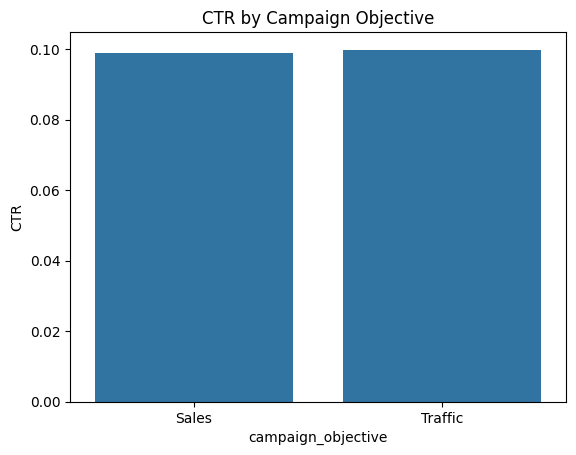

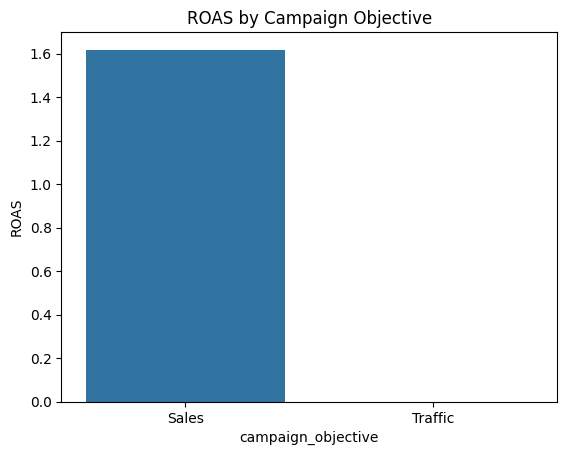

In [ ]:
# Visualisasi Perbandingan Objective

metrics = ['CTR', 'ROAS']

for metric in metrics:
    plt.figure()
    sns.barplot(data=objective_perf, x='campaign_objective', y=metric)
    plt.title(f"{metric} by Campaign Objective")
    plt.show()

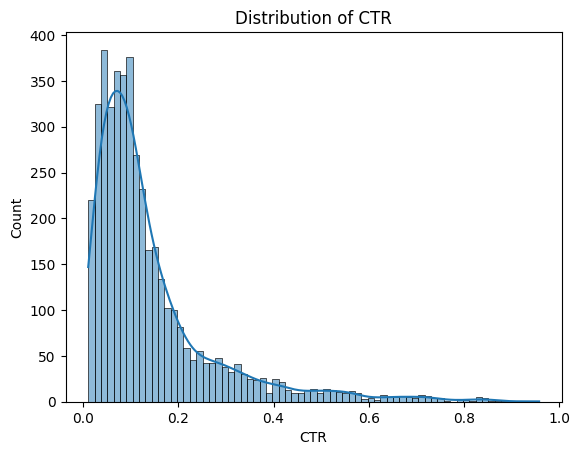

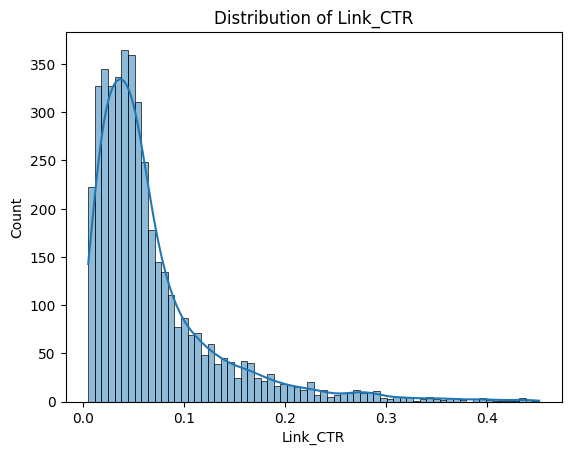

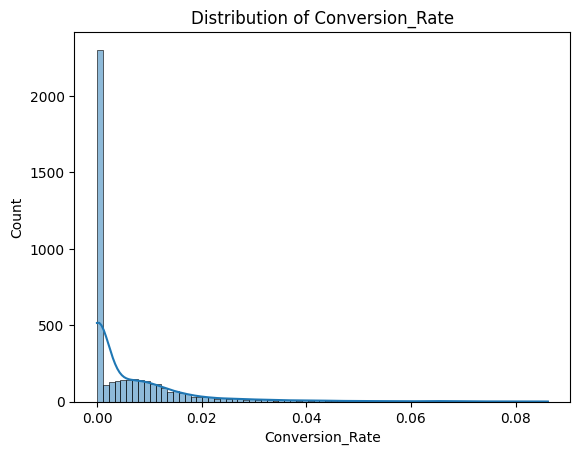

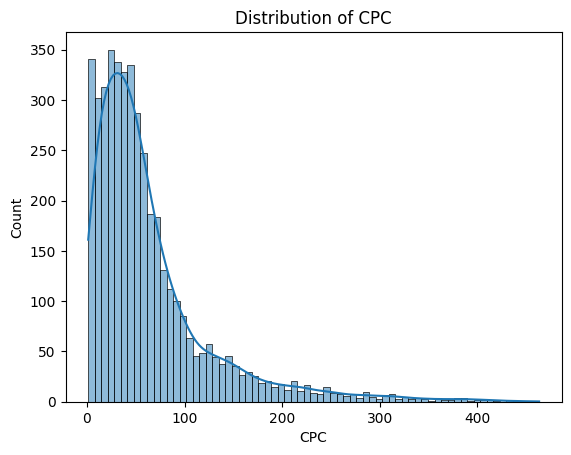

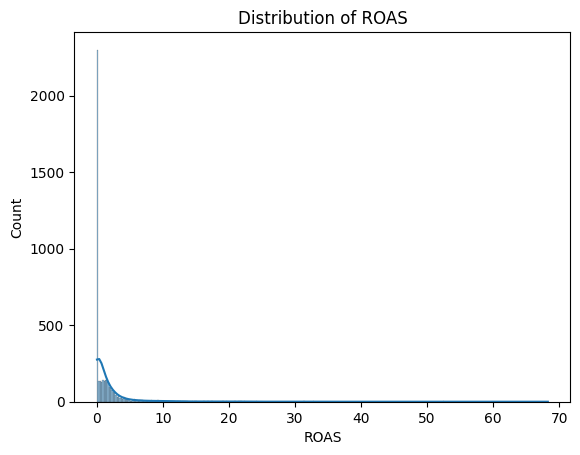

In [ ]:
# DISTRIBUSI METRICS

performance_cols = ['CTR', 'Link_CTR', 'Conversion_Rate', 'CPC', 'ROAS']

for col in performance_cols:
    plt.figure()
    sns.histplot(df_prep[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Kode di bawah adalah metode **Weighted KPI Calculation** untuk menghasilkan KPI agregat menggunakan weighted aggregation.

In [ ]:
# Weighted CTR
overall_ctr = df_prep['clicks'].sum() / df_prep['impressions'].sum()

# Weighted ROAS
overall_roas = df_prep['purchase_value'].sum() / df_prep['amount_spent'].sum()

# Profit ROAS
overall_profit_roas = df_prep['estimated_profit'].sum() / df_prep['amount_spent'].sum()

print("Overall CTR:", overall_ctr)
print("Overall ROAS:", overall_roas)
print("Overall Profit ROAS:", overall_profit_roas)

Overall CTR: 0.09932480453464518
Overall ROAS: 0.8068008185729967
Overall Profit ROAS: 0.24204024557189902


In [ ]:
# Weighted KPI per Campaign Objective
objective_perf = df_prep.groupby('campaign_objective').apply(
    lambda x: pd.Series({
        'CTR': x['clicks'].sum()/x['impressions'].sum(),
        'ROAS': x['purchase_value'].sum()/x['amount_spent'].sum(),
        'Profit_ROAS': x['estimated_profit'].sum()/x['amount_spent'].sum()
    })
)
objective_perf

,CTR,ROAS,Profit_ROAS
campaign_objective,,,
Sales,0.098803,1.618389,0.485517
Traffic,0.099846,0.000000,0.000000


Interpretasi Weighted KPI Agregat:

* CTR sebesar **9,93%** menunjukkan dari seluruh impresi iklan, sekitar **1 dari 10 audiens melakukan klik**. Angka ini menandakan daya tarik kreatif dan relevansi iklan sudah cukup kuat dalam menarik perhatian pasar.
* ROAS sebesar **0,81** menunjukkan setiap **Rp1 biaya iklan hanya menghasilkan Rp0,81 revenue**, sehingga secara keseluruhan aktivitas iklan masih belum mencapai titik impas dan berpotensi mengurangi profit perusahaan.
* Profit ROAS sebesar **0,24** menunjukkan setiap **Rp1 biaya iklan hanya menghasilkan Rp0,24 profit bersih**, menandakan margin keuntungan masih rendah dan efisiensi biaya pemasaran perlu ditingkatkan.
* Perbedaan signifikan antara CTR yang relatif tinggi dan ROAS yang rendah menunjukkan bahwa masalah utama performa bisnis berada pada **kualitas konversi dan monetisasi**, bukan pada kemampuan menarik audiens.

---

Interpretasi Weighted KPI Berdasarkan Campaign Objective:

* Campaign **Sales memiliki ROAS 1,62 dan Profit ROAS 0,49**, menunjukkan setiap Rp1 biaya iklan mampu menghasilkan Rp1,62 revenue dan Rp0,49 profit. Angka ini menegaskan bahwa campaign Sales merupakan pendorong utama pendapatan dan memiliki efisiensi bisnis yang baik.
* Campaign **Traffic memiliki CTR sedikit lebih tinggi (9,98%) dibanding Sales**, menunjukkan strategi awareness berhasil meningkatkan interaksi pengguna terhadap iklan.
* Campaign **Traffic tidak menghasilkan revenue maupun profit**, sehingga efektivitasnya hanya terbatas pada peningkatan exposure dan belum berkontribusi langsung terhadap monetisasi bisnis.
* Perbedaan performa antara Traffic dan Sales menunjukkan funnel pemasaran belum optimal, karena trafik yang dihasilkan belum berhasil dikonversi menjadi pembelian.
* Insight strategis yang muncul adalah campaign Traffic sebaiknya digunakan sebagai tahap akuisisi awal yang diikuti dengan strategi retargeting atau optimasi konversi agar trafik yang tinggi dapat diterjemahkan menjadi revenue dan profit.

## 4.2. Trend & Time Series Analysis

Tujuan:

- Mendeteksi pertumbuhan performa
- Mengidentifikasi momentum bisnis
- Mengungkap pola musiman

Metode:
- Daily Aggregation
- Moving Average Smoothing
- Growth Rate Analysis
- Seasonality Detection

In [ ]:
# DAILY PERFORMANCE TREND

daily_trend = df_prep.groupby('created_date').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

daily_trend['ROAS'] = daily_trend['purchase_value'] / daily_trend['amount_spent']

In [ ]:
# Moving Average (7-day smoothing)
daily_trend['Spend_MA7'] = daily_trend['amount_spent'].rolling(7).mean()
daily_trend['Revenue_MA7'] = daily_trend['purchase_value'].rolling(7).mean()
daily_trend['ROAS_MA7'] = daily_trend['ROAS'].rolling(7).mean()

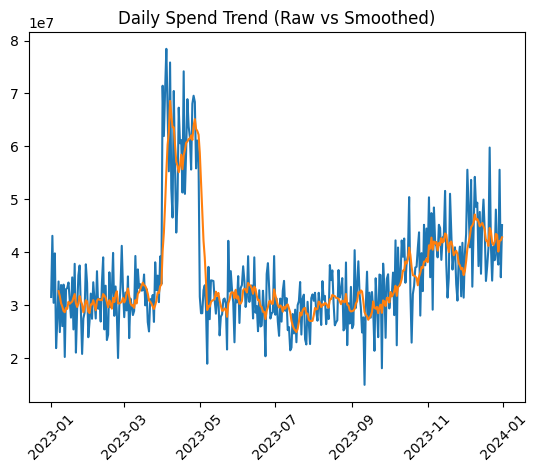

In [ ]:
# Plot Spend Trend
plt.figure()
plt.plot(daily_trend['created_date'], daily_trend['amount_spent'])
plt.plot(daily_trend['created_date'], daily_trend['Spend_MA7'])
plt.title("Daily Spend Trend (Raw vs Smoothed)")
plt.xticks(rotation=45)
plt.show()

Grafik menunjukkan lonjakan belanja iklan pada Maret hingga April 2023 menunjukkan ekspansi investasi marketing yang agresif, dengan spend bulanan meningkat lebih dari dua kali lipat dibanding periode sebelumnya. Garis MA7 memperlihatkan tren kenaikan yang konsisten, menandakan bahwa peningkatan bukan sekadar fluktuasi harian melainkan strategi scale-up kampanye. Penurunan tajam setelah periode tersebut mengindikasikan fase evaluasi atau berakhirnya kampanye besar, sementara kenaikan bertahap setelahnya menunjukkan upaya stabilisasi pertumbuhan bisnis.

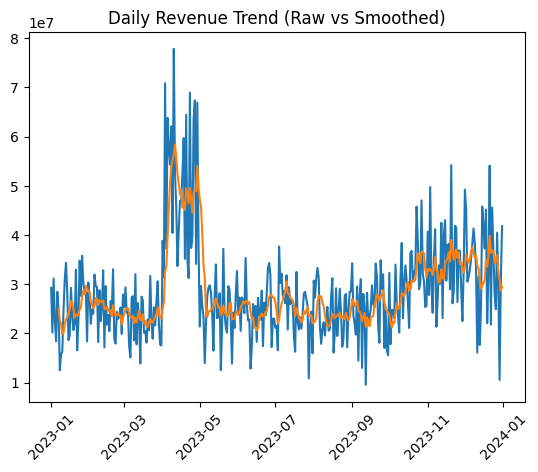

In [ ]:
# Plot Revenue Trend
plt.figure()
plt.plot(daily_trend['created_date'], daily_trend['purchase_value'])
plt.plot(daily_trend['created_date'], daily_trend['Revenue_MA7'])
plt.title("Daily Revenue Trend (Raw vs Smoothed)")
plt.xticks(rotation=45)
plt.show()


Grafik revenue memperlihatkan pola yang hampir identik dengan spend, menunjukkan hubungan kuat antara belanja iklan dan omzet yang dihasilkan. Lonjakan revenue pada Maret hingga Mei mengindikasikan efektivitas kampanye dalam menghasilkan penjualan. Setelah periode tersebut, revenue mengalami penurunan tetapi tetap menunjukkan tren peningkatan jangka panjang. Pola ini mengindikasikan bahwa kampanye berskala besar mampu menciptakan demand spike namun memerlukan strategi retensi untuk menjaga stabilitas omzet setelahnya.

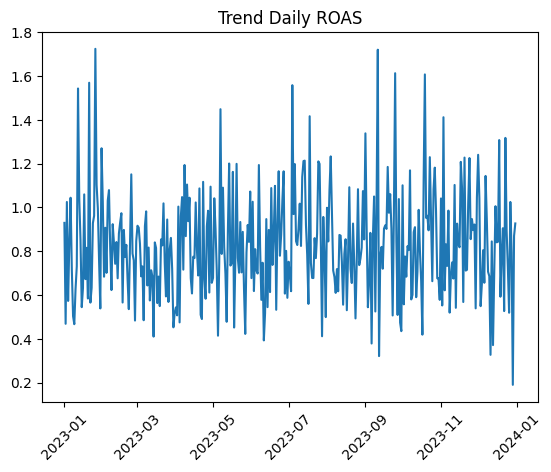

In [ ]:
# Plot ROAS Trend
plt.figure()
plt.plot(daily_trend['created_date'], daily_trend['ROAS'])
plt.title("Trend Daily ROAS")
plt.xticks(rotation=45)
plt.show()

Pada grafik ROAS, fluktuasi ROAS dalam rentang sekitar 0.2 hingga 1.75 menunjukkan efisiensi kampanye yang sangat dinamis. Nilai ROAS di bawah 1 menandakan periode di mana biaya iklan lebih besar dibanding revenue yang dihasilkan, sementara nilai mendekati 1.75 menunjukkan kampanye sangat efisien dalam menghasilkan keuntungan. Variasi besar ini menunjukkan bahwa peningkatan spend tidak selalu diikuti peningkatan efisiensi, sehingga optimasi strategi targeting, funnel konversi, dan kualitas traffic menjadi faktor penentu profitabilitas.

In [ ]:
# DAILY PERFORMANCE + GROWTH

daily_trend = (
    df_prep
    .groupby('created_date')
    .agg({
        'amount_spent': 'sum',
        'purchase_value': 'sum',
        'ROAS': 'mean'
    })
    .reset_index()
    .sort_values('created_date')  # penting!
)

# Growth Rate Daily
daily_trend['Revenue_Growth'] = daily_trend['purchase_value'].pct_change()
daily_trend

,created_date,amount_spent,purchase_value,ROAS,Revenue_Growth
0,2023-01-01,31508938.0,29278339.0,1.435104,NaN
1,2023-01-02,43079926.0,20176672.0,0.819006,-0.310867
2,2023-01-03,30411261.0,31162498.0,1.536200,0.544482
3,2023-01-04,39761621.0,22774055.0,1.217158,-0.269184
4,2023-01-05,21841254.0,18417248.0,3.918590,-0.191306
...,...,...,...,...,...
360,2023-12-27,39496096.5,40473496.5,1.809799,0.623599
361,2023-12-28,37636047.0,29871904.5,2.688659,-0.261939
362,2023-12-29,55575127.5,10535506.5,0.248352,-0.647311
363,2023-12-30,35242258.5,30656658.0,1.279051,1.909842


Interpretasi Growth Rate Analysis – Daily Revenue Growth:

Pertumbuhan revenue harian menunjukkan volatilitas tinggi dengan perubahan drastis antar hari. Lonjakan growth lebih dari 100% pada beberapa periode menandakan adanya momentum kampanye promosi atau event khusus, sedangkan penurunan tajam menunjukkan berakhirnya momentum tersebut. Pola ini memperlihatkan bahwa performa digital marketing sangat dipengaruhi oleh dinamika kampanye jangka pendek dan respons pasar yang cepat berubah.

In [ ]:
# MONTHLY PERFORMANCE + GROWTH

df_prep['month'] = df_prep['created_date'].dt.to_period('M')

monthly_perf = df_prep.groupby('month').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

monthly_perf['ROAS'] = monthly_perf['purchase_value'] / monthly_perf['amount_spent']

# Growth Rate Monthly
monthly_perf['Revenue_Growth'] = monthly_perf['purchase_value'].pct_change()
monthly_perf

,month,amount_spent,purchase_value,ROAS,Revenue_Growth
0,2023-01,9.491030e+08,7.780761e+08,0.819802,NaN
1,2023-02,8.681966e+08,6.951760e+08,0.800713,-0.106545
2,2023-03,9.863171e+08,7.125986e+08,0.722484,0.025062
3,2023-04,1.853354e+09,1.494403e+09,0.806324,1.097118
4,2023-05,9.487109e+08,7.651272e+08,0.806491,-0.488005
5,2023-06,9.451684e+08,7.385859e+08,0.781433,-0.034689
6,2023-07,8.668428e+08,7.639872e+08,0.881345,0.034392
7,2023-08,9.437389e+08,7.572559e+08,0.802400,-0.008811
8,2023-09,9.024532e+08,7.336739e+08,0.812977,-0.031141
9,2023-10,1.124950e+09,9.347719e+08,0.830945,0.274097


Interpretasi Monthly Aggregation – Monthly Performance & Growth:

Analisis bulanan menunjukkan stabilitas performa yang lebih representatif untuk evaluasi strategi jangka menengah. Revenue mengalami lonjakan besar pada April 2023 dengan pertumbuhan sekitar 109%, menunjukkan periode kampanye dengan dampak bisnis paling signifikan. Penurunan drastis pada Mei sekitar −48% menunjukkan efek normalisasi setelah peak campaign. Pada kuartal akhir tahun, pertumbuhan kembali meningkat secara konsisten, yang mengindikasikan adanya pola seasonality yang berkaitan dengan momentum belanja akhir tahun.

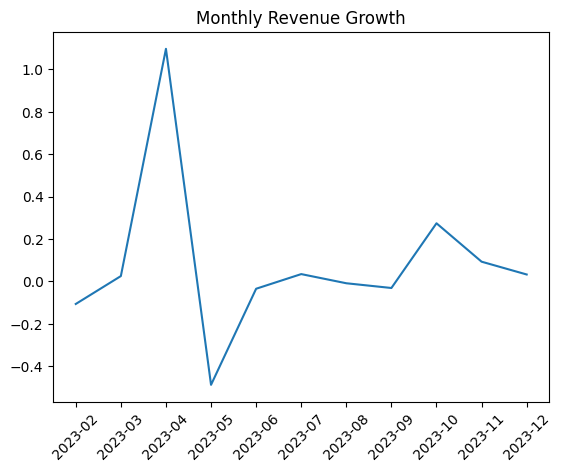

In [ ]:
# Visualisasi Growth
plt.figure()
plt.plot(monthly_perf['month'].astype(str), monthly_perf['Revenue_Growth'])
plt.title("Monthly Revenue Growth")
plt.xticks(rotation=45)
plt.show()

Interpetasi Monthly Revenue Growth Visualization:

Grafik pertumbuhan bulanan memperlihatkan volatilitas yang lebih terkendali dibanding data harian sehingga lebih mudah digunakan untuk memetakan momentum bisnis. Lonjakan pertumbuhan ekstrem menandakan periode ekspansi agresif, sedangkan fase penurunan tajam menunjukkan perlunya strategi retensi dan optimasi efisiensi kampanye. Stabilitas pertumbuhan pada paruh kedua tahun menunjukkan bahwa strategi pemasaran mulai mencapai keseimbangan antara scale-up dan efisiensi.

Di bawah ini adalah metode **Moving Average + Anomaly Detection (Z-Score)** untuk menganalisis tren performa dan mendeteksi anomali bisnis.

In [ ]:
daily_perf = df_prep.groupby('created_date').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

daily_perf['ROAS'] = daily_perf['purchase_value'] / daily_perf['amount_spent']

# Moving Average
daily_perf['ROAS_MA7'] = daily_perf['ROAS'].rolling(7).mean()

# Z-score anomaly detection
daily_perf['ROAS_Z'] = (
    (daily_perf['ROAS'] - daily_perf['ROAS'].mean()) /
    daily_perf['ROAS'].std()
)

anomaly_days = daily_perf[abs(daily_perf['ROAS_Z']) > 2]
display(anomaly_days)


,created_date,amount_spent,purchase_value,ROAS,ROAS_MA7,ROAS_Z
11,2023-01-12,20168095.0,31118907.0,1.542977,0.804280,2.904969
20,2023-01-21,20992451.0,32942614.0,1.569260,0.839509,3.011898
25,2023-01-26,20742455.0,35762183.0,1.724106,0.994953,3.641865
126,2023-05-07,18894487.0,27365912.0,1.448354,0.849431,2.520011
184,2023-07-04,24164233.0,37651142.0,1.558135,0.801654,2.966638
198,2023-07-18,22952271.0,32505762.0,1.416233,1.034834,2.389330
243,2023-09-01,25591528.0,34243030.0,1.338061,0.952541,2.071299
253,2023-09-11,14898483.0,25626592.0,1.720081,0.918020,3.625489
254,2023-09-12,29772453.0,9556080.0,0.320971,0.837642,-2.066585
267,2023-09-25,18032428.0,29082008.0,1.612762,1.031484,3.188878


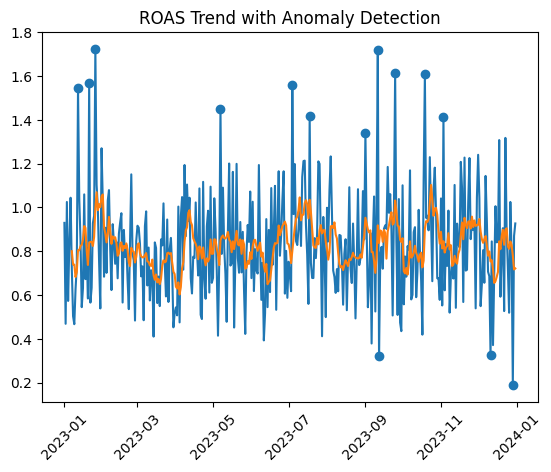

In [ ]:
plt.figure()
plt.plot(daily_perf['created_date'], daily_perf['ROAS'])
plt.plot(daily_perf['created_date'], daily_perf['ROAS_MA7'])

plt.scatter(anomaly_days['created_date'], anomaly_days['ROAS'])

plt.title("ROAS Trend with Anomaly Detection")
plt.xticks(rotation=45)
plt.show()

Alasan Menggunakan Time Series Based Trend (TSBT):

Pendekatan TSBT memungkinkan identifikasi pola performa bisnis secara kronologis sehingga dapat menangkap perubahan tren, momentum kampanye, dan seasonality secara lebih akurat. Metode daily aggregation membantu mendeteksi fluktuasi jangka pendek dan respons pasar secara cepat, sedangkan monthly aggregation memberikan gambaran stabil untuk evaluasi strategi bisnis jangka menengah. Moving average smoothing digunakan untuk mengurangi noise data harian sehingga tren utama lebih terlihat, sementara growth rate analysis membantu mengukur kecepatan ekspansi bisnis dan mendeteksi momentum performa. Pendekatan ini memungkinkan pengambilan keputusan marketing yang lebih adaptif, berbasis tren historis, serta mampu mengantisipasi pola musiman dalam performa kampanye digital.

## 4.3. Industry & Account Analysis

Tujuan
- Menentukan sektor bisnis paling profitable
- Mengidentifikasi brand high performer
- Mengoptimalkan alokasi budget

In [ ]:
# INDUSTRY PERFORMANCE

industry_perf = df_prep.groupby('industry').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

industry_perf['ROAS'] = industry_perf['purchase_value'] / industry_perf['amount_spent']
industry_perf['Revenue_Contribution'] = industry_perf['purchase_value'] / total_revenue

industry_perf = industry_perf.sort_values(by='ROAS', ascending=False)
industry_perf

,industry,amount_spent,purchase_value,ROAS,Revenue_Contribution
0,Beauty,4.308938e+09,3.502457e+09,0.812835,0.335157
1,FMCG,4.292350e+09,3.458425e+09,0.805718,0.330943
2,Fashion,4.351367e+09,3.489331e+09,0.801893,0.333900


In [ ]:
# Weighted Group Aggregation
# Tujuan: Menghilangkan bias rata-rata menggunakan weighted ROAS.

industry_analysis = df_prep.groupby('industry').apply(
    lambda x: pd.Series({
        'Spend': x['amount_spent'].sum(),
        'Revenue': x['purchase_value'].sum(),
        'Weighted_ROAS': x['purchase_value'].sum() / x['amount_spent'].sum(),
        'Profit_ROAS': x['estimated_profit'].sum() / x['amount_spent'].sum()
    })
).sort_values('Weighted_ROAS', ascending=False)

Revenue Contribution adalah porsi kontribusi revenue suatu kategori (industry) terhadap total revenue keseluruhan.

Revenue Contribution dipakai buat:
- Prioritization: Industry mana yang paling “berat” kontribusinya ke bisnis
- Risk management: Kalau satu industry drop, dampaknya ke total revenue seberapa besar?
- Budget allocation: Spend besar tapi contribution kecil → red flag
- Strategic insight:
  - Contribution besar + ROAS rendah → masih bisa dioptimasi
  - Contribution kecil + ROAS tinggi → kandidat scale up

Rumus:
- Revenue Contribution =
Revenue industry / Total revenue semua industry

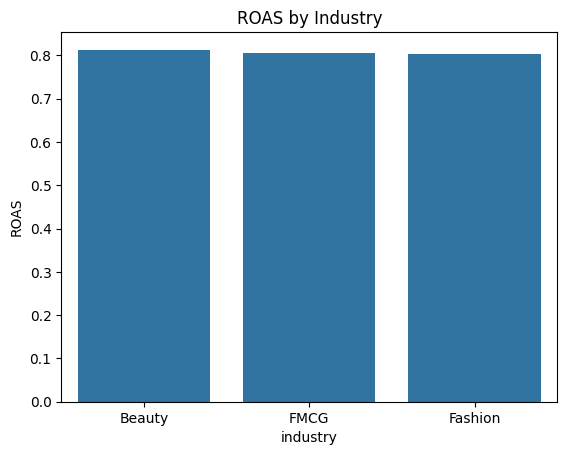

In [ ]:
plt.figure()
sns.barplot(data=industry_perf, x='industry', y='ROAS')
plt.title("ROAS by Industry")
plt.show()

Interpretasi:
- Beauty menyumbang ~33.5% dari total revenue
- FMCG ~33.1%
- Fashion ~33.4%

Insight:
- Beauty: contribution tertinggi (33.5%) + ROAS paling tinggi

  → strong & healthy

- Fashion: contribution tinggi tapi ROAS paling rendah

  → perlu optimasi

- FMCG: middle ground

In [ ]:
# ACCOUNT PERFORMANCE

account_perf = df_prep.groupby('account_name').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

account_perf['ROAS'] = account_perf['purchase_value'] / account_perf['amount_spent']
account_perf['Revenue_Contribution'] = account_perf['purchase_value'] / total_revenue

account_perf = account_perf.sort_values(by='ROAS', ascending=False)
account_perf

,account_name,amount_spent,purchase_value,ROAS,Revenue_Contribution
2,Client C - Fashion,2.127994e+09,1.779702e+09,0.836328,0.170303
1,Client B - Beauty,2.094255e+09,1.739974e+09,0.830832,0.166501
4,Client E - FMCG,2.140263e+09,1.739546e+09,0.812772,0.166460
5,Client F - FMCG,2.152087e+09,1.718880e+09,0.798704,0.164483
3,Client D - Beauty,2.214683e+09,1.762483e+09,0.795817,0.168655
0,Client A - Fashion,2.223373e+09,1.709628e+09,0.768935,0.163597


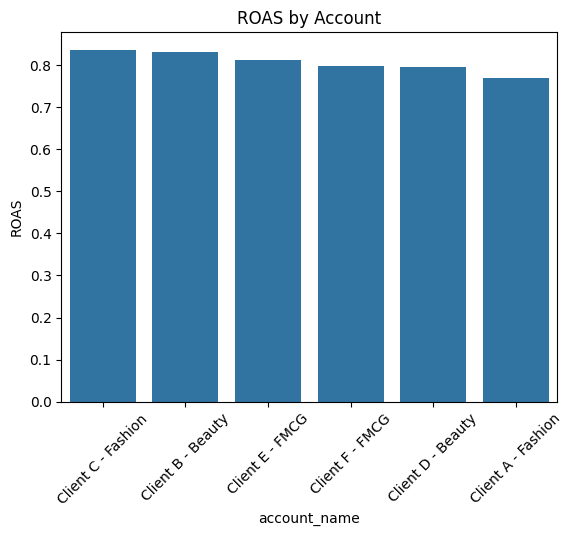

In [ ]:
plt.figure()
sns.barplot(data=account_perf, x='account_name', y='ROAS')
plt.xticks(rotation=45)
plt.title("ROAS by Account")
plt.show()

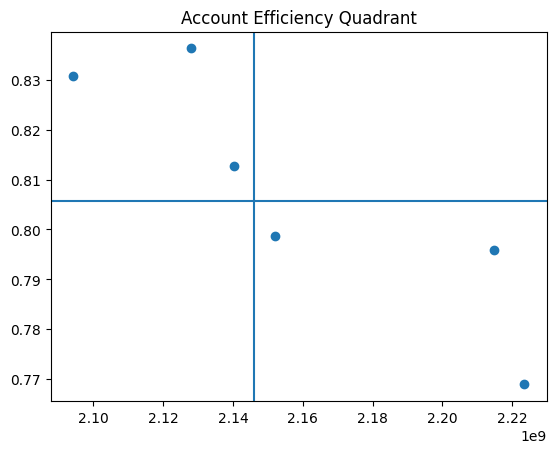

In [ ]:
# Account Efficiency Quadrant
account_analysis = df_prep.groupby('account_name').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
})

account_analysis['ROAS'] = (
    account_analysis['purchase_value'] /
    account_analysis['amount_spent']
)

median_spend = account_analysis['amount_spent'].median()
median_roas = account_analysis['ROAS'].median()

plt.figure()
plt.scatter(account_analysis['amount_spent'], account_analysis['ROAS'])

plt.axvline(median_spend)
plt.axhline(median_roas)

plt.title("Account Efficiency Quadrant")
plt.show()

Interpretasi:
- Beauty menyumbang ~33.5% dari total revenue
- FMCG ~33.1%
- Fashion ~33.4%

Interpretasi:
- Client C Fashion menyumbang ~17.0% dari total revenue
- Client D Beauty menyumbang ~16.9%
- Client B Beauty menyumbang ~16.7%
- Client E FMCG menyumbang ~16.6%
- Client F FMCG menyumbang ~16.4%
- Client A Fashion menyumbang ~16.4%

→ Kontribusi revenue antar account relatif merata, tidak ada single account yang terlalu dominan (>20%).

Insight:
- Client C Fashion: Revenue contribution tertinggi (~17.0%) dan ROAS tertinggi (0.84)
  - Top performer & paling efisien
  - Kandidat utama untuk scale budget

- Client B: Beauty: Contribution tinggi (~16.7%) dan ROAS kuat (0.83)
  -  Healthy & stabil
  - Bisa dinaikkan spend dengan kontrol efisiensi

- Client D Beauty: Contribution tinggi (~16.9%) dan ROAS relatif lebih rendah (0.80)
  - Revenue besar tapi efisiensi mulai turun
  - Perlu optimasi (creative / targeting / funnel)

- Client E & F FMCG: Contribution menengah (~16.4–16.6%) dan ROAS menengah (0.80–0.81)
  - Middle ground
  - Fokus ke incremental improvement, bukan agresif scaling

- Client A Fashion: Contribution cukup tinggi (~16.4%) dan ROAS terendah (0.77)
  - High spend, low efficiency
  - Kandidat utama untuk audit & cost control

Ringkasan:
- Scale: Client C (Fashion), Client B (Beauty)
- Optimize: Client D (Beauty), Client A (Fashion)
- Maintain: Client E & F (FMCG)

## 4.4. Funnel/Bottleneck Analysis

Tujuan:
- Mengidentifikasi titik kehilangan konversi
- Menentukan prioritas optimasi funnel

In [ ]:
# FUNNEL VOLUME

funnel = df_prep[['impressions','clicks','content_views','add_to_cart','purchase']].sum()

funnel_df = pd.DataFrame({
    'Stage': funnel.index,
    'Volume': funnel.values
})
funnel_df

,Stage,Volume
0,impressions,2.851285e+09
1,clicks,2.832034e+08
2,content_views,1.432355e+07
3,add_to_cart,1.443744e+06
4,purchase,1.313542e+06


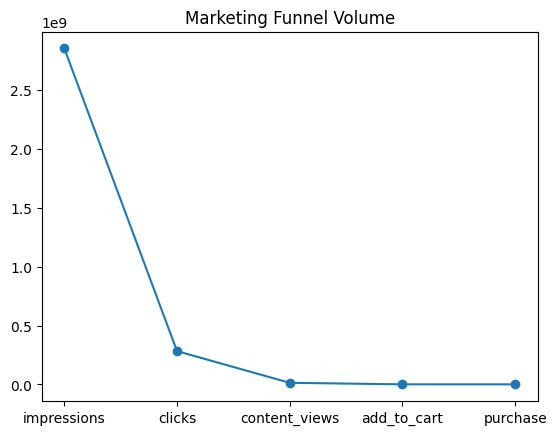

In [ ]:
# Visualisasi Funnel
plt.figure()
plt.plot(funnel_df['Stage'], funnel_df['Volume'], marker='o')
plt.title("Marketing Funnel Volume")
plt.show()

In [ ]:
# FUNNEL CONVERSION RATE

# Tujuan: Memecah conversion per stage funnel.
# Metode: Stage-to-Stage Conversion Rate

funnel_df['Next_Volume'] = funnel_df['Volume'].shift(-1)
funnel_df['Conversion_Rate'] = funnel_df['Next_Volume'] / funnel_df['Volume']

# Drop-off rate
funnel_df['Drop_Off'] = 1 - funnel_df['Conversion_Rate']
funnel_conversion = funnel_df.dropna()
display(funnel_conversion[['Stage', 'Conversion_Rate', 'Drop_Off']])

,Stage,Conversion_Rate,Drop_Off
0,impressions,0.099325,0.900675
1,clicks,0.050577,0.949423
2,content_views,0.100795,0.899205
3,add_to_cart,0.909816,0.090184


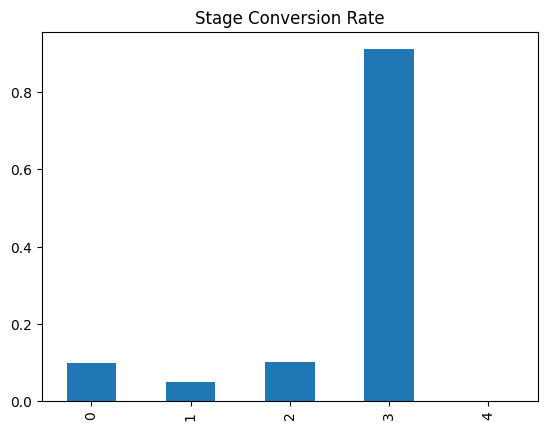

In [ ]:
# Funnel Visualization
plt.figure()
funnel_df['Conversion_Rate'].plot(kind='bar')
plt.title("Stage Conversion Rate")
plt.show()

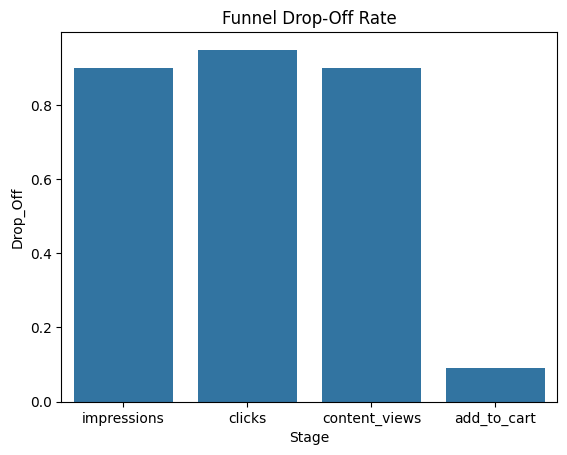

In [ ]:
# Drop-off Rate
funnel_conversion['Drop_Off'] = 1 - funnel_conversion['Conversion_Rate']

plt.figure()
sns.barplot(data=funnel_conversion, x='Stage', y='Drop_Off')
plt.title("Funnel Drop-Off Rate")
plt.show()

Interpretasi:

- Impressions → Clicks
  - Conversion rate: ~9.9%
  - Drop-off: ~90.1%

  → Mayoritas audience melihat iklan tapi tidak mengklik.

- Clicks → Content Views
  - Conversion rate: ~5.1%
  - Drop-off: ~94.9% (tertinggi)

  → Hampir semua user yang klik tidak lanjut melihat konten.

- Content Views → Add to Cart
  - Conversion rate: ~10.1%
  - Drop-off: ~89.9%
  
  → Minat ada, tapi hanya sedikit yang masuk fase intent.

- Add to Cart → Purchase
  - Conversion rate: ~91.0%
  - Drop-off: ~9.0% (terendah)

  → Funnel bawah sangat efisien.

Insight:

🔴 Bottleneck terbesar: Clicks → Content Views
- Drop-off paling tinggi (~95%)
- Indikasi masalah post-click experience

  → Prioritas utama optimasi (landing page, load time, tracking, relevansi pesan)

🟠 Upper funnel lemah (Impressions → Clicks)
- CTR masih rendah (~10%)

  → Perlu optimasi creative, audience, dan message match

🟠 Mid-funnel (Content → Add to Cart) masih bocor besar
- Minat belum cukup kuat untuk konversi ke intent

  → Fokus ke value proposition, pricing clarity, dan UX

🟢 Lower funnel sangat sehat
- Add to Cart → Purchase sangat tinggi (~91%)

   → Checkout & payment bukan masalah utama

Prioritas Optimasi Funnel:

1. Post-click / Landing page (Clicks → Content Views)

2. Ad relevance & creative (Impressions → Clicks)

3. Product & UX (Content Views → Add to Cart)
4️
4. Checkout (low priority – already efficient)

## 4.5. Growth & Profitability Analysis

Tujuan:

Mengukur pertumbuhan dan dampaknya terhadap profit.

Metode:

Month-over-Month Growth Analysis

In [ ]:
df_prep['month'] = df_prep['created_date'].dt.to_period('M')

monthly_perf = df_prep.groupby('month').agg({
    'amount_spent':'sum',
    'purchase_value':'sum'
}).reset_index()

monthly_perf['ROAS'] = (
    monthly_perf['purchase_value'] /
    monthly_perf['amount_spent']
)

monthly_perf['Revenue_Growth'] = monthly_perf['purchase_value'].pct_change()
monthly_perf['Spend_Growth'] = monthly_perf['amount_spent'].pct_change()
monthly_perf

,month,amount_spent,purchase_value,ROAS,Revenue_Growth,Spend_Growth
0,2023-01,9.491030e+08,7.780761e+08,0.819802,NaN,NaN
1,2023-02,8.681966e+08,6.951760e+08,0.800713,-0.106545,-0.085245
2,2023-03,9.863171e+08,7.125986e+08,0.722484,0.025062,0.136053
3,2023-04,1.853354e+09,1.494403e+09,0.806324,1.097118,0.879065
4,2023-05,9.487109e+08,7.651272e+08,0.806491,-0.488005,-0.488111
5,2023-06,9.451684e+08,7.385859e+08,0.781433,-0.034689,-0.003734
6,2023-07,8.668428e+08,7.639872e+08,0.881345,0.034392,-0.082869
7,2023-08,9.437389e+08,7.572559e+08,0.802400,-0.008811,0.088708
8,2023-09,9.024532e+08,7.336739e+08,0.812977,-0.031141,-0.043747
9,2023-10,1.124950e+09,9.347719e+08,0.830945,0.274097,0.246547


Korelasi Pearson: 0.97


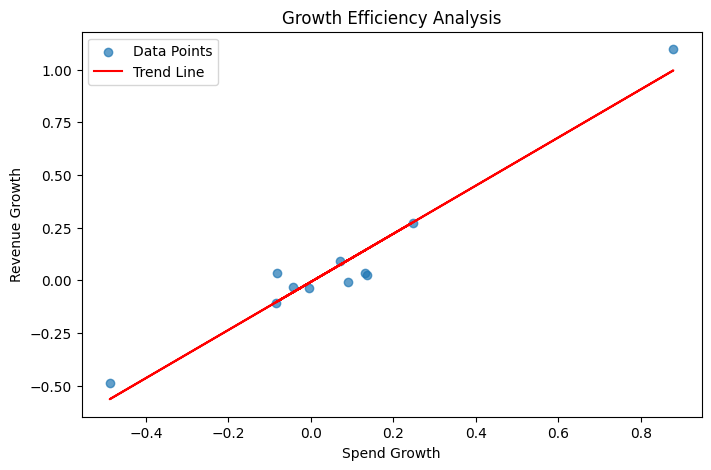

In [ ]:
# Ambil x dan y
x = monthly_perf['Spend_Growth']
y = monthly_perf['Revenue_Growth']

# Hapus baris pertama yang NaN karena pct_change()
x = x[1:]
y = y[1:]

# Hitung korelasi Pearson
corr = x.corr(y)
print(f"Korelasi Pearson: {corr:.2f}")

# Buat scatter plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7, label='Data Points')

# Tambahkan garis regresi linear
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Trend Line')

plt.xlabel("Spend Growth")
plt.ylabel("Revenue Growth")
plt.title("Growth Efficiency Analysis")
plt.legend()
plt.show()

In [ ]:
# Pastikan format datetime
df_prep['created_date'] = pd.to_datetime(df_prep['created_date'])

# Buat kolom bulan
df_prep['month'] = df_prep['created_date'].dt.to_period('M')

# Agregasi bulanan
monthly_dataset = (
    df_prep
    .groupby('month')
    .agg({
        'amount_spent': 'sum',
        'purchase_value': 'sum'
    })
    .reset_index()
)

# Hitung ROAS
monthly_dataset['ROAS'] = (
    monthly_dataset['purchase_value'] /
    monthly_dataset['amount_spent']
)

# Growth
monthly_dataset['Revenue_Growth'] = monthly_dataset['purchase_value'].pct_change()
monthly_dataset['Spend_Growth'] = monthly_dataset['amount_spent'].pct_change()

# Hitung korelasi Pearson (drop NaN dulu)
corr_value = monthly_dataset[['Spend_Growth','Revenue_Growth']].dropna().corr().iloc[0,1]

# Tambahkan sebagai kolom baru
monthly_dataset['Growth_Correlation'] = corr_value

monthly_dataset['Rolling_Correlation'] = (
    monthly_dataset['Spend_Growth']
    .rolling(window=3)
    .corr(monthly_dataset['Revenue_Growth'])
)

monthly_dataset

,month,amount_spent,purchase_value,ROAS,Revenue_Growth,Spend_Growth,Growth_Correlation,Rolling_Correlation
0,2023-01,9.491030e+08,7.780761e+08,0.819802,NaN,NaN,0.974575,NaN
1,2023-02,8.681966e+08,6.951760e+08,0.800713,-0.106545,-0.085245,0.974575,NaN
2,2023-03,9.863171e+08,7.125986e+08,0.722484,0.025062,0.136053,0.974575,NaN
3,2023-04,1.853354e+09,1.494403e+09,0.806324,1.097118,0.879065,0.974575,0.992687
4,2023-05,9.487109e+08,7.651272e+08,0.806491,-0.488005,-0.488111,0.974575,0.988665
5,2023-06,9.451684e+08,7.385859e+08,0.781433,-0.034689,-0.003734,0.974575,0.997145
6,2023-07,8.668428e+08,7.639872e+08,0.881345,0.034392,-0.082869,0.974575,0.962455
7,2023-08,9.437389e+08,7.572559e+08,0.802400,-0.008811,0.088708,0.974575,-0.583186
8,2023-09,9.024532e+08,7.336739e+08,0.812977,-0.031141,-0.043747,0.974575,-0.390472
9,2023-10,1.124950e+09,9.347719e+08,0.830945,0.274097,0.246547,0.974575,0.918119


Interpretasi:

**Growth_Correlation (Overall Correlation = 0.974575)**

- Menunjukkan hubungan sangat kuat dan positif antara pertumbuhan spend dan pertumbuhan revenue sepanjang periode 2023.
- Nilai mendekati +1 menandakan bahwa ketika anggaran iklan meningkat, revenue cenderung ikut meningkat dengan pola yang hampir searah.
- Hubungan yang sangat tinggi ini mengindikasikan bahwa performa bisnis sangat bergantung pada intensitas investasi pemasaran.
- Konsistensi nilai yang tetap sama pada setiap bulan menegaskan bahwa metrik ini merepresentasikan korelasi global, bukan perubahan hubungan antar bulan.
- Kondisi ini menunjukkan strategi scaling budget berpotensi efektif dalam meningkatkan revenue secara keseluruhan.
• Namun, korelasi tinggi tidak selalu menandakan efisiensi biaya, sehingga tetap perlu dianalisis bersamaan dengan ROAS untuk menilai profitabilitas.

---------------------------------------------------------------------

**Rolling_Correlation (Dynamic Monthly Correlation – Window 3 Bulan)**

Periode Awal (Apr – Jun 2023)
- Apr 2023 = 0.992687 → Hubungan sangat kuat antara pertumbuhan spend dan revenue.
- Mei 2023 = 0.988665 → Hubungan masih stabil dan sangat sinkron.
- Jun 2023 = 0.997145 → Efektivitas kampanye berada pada kondisi optimal.

  → Menunjukkan fase ekspansi pemasaran dengan performa revenue yang sangat responsif terhadap peningkatan budget.

Periode Stabil Menurun (Jul 2023)
- Jul 2023 = 0.962455 → Hubungan masih sangat kuat namun mulai sedikit melemah.

  → Mengindikasikan mulai munculnya diminishing return atau perubahan respons pasar.

Periode Anomali / Ketidaksinkronan (Aug – Sep 2023)

- Aug 2023 = -0.583186 → Korelasi berubah menjadi negatif kuat.

  - Menunjukkan peningkatan spend tidak menghasilkan pertumbuhan revenue.

  - Berpotensi disebabkan oleh targeting kurang tepat, kualitas traffic rendah, atau fase eksperimen kampanye.

- Sep 2023 = -0.390472 → Hubungan masih negatif namun mulai membaik.

  → Mengindikasikan adanya proses penyesuaian strategi pemasaran.

Periode Pemulihan dan Optimalisasi (Oct – Dec 2023)

- Oct 2023 = 0.918119 → Hubungan kembali sangat kuat dan positif.

  → Menunjukkan optimasi kampanye mulai berhasil.

- Nov 2023 = 0.999844 → Hubungan hampir sempurna.

  → Mengindikasikan efisiensi marketing mencapai titik optimal.

- Dec 2023 = 0.832600 → Hubungan tetap kuat meskipun sedikit menurun.

  → Kemungkinan dipengaruhi oleh fluktuasi seasonal akhir tahun atau peningkatan kompetisi pasar.


# 5. Business Insight & Interpretation
Insight utama:

- Pertumbuhan spend memiliki korelasi sangat kuat dengan pertumbuhan revenue (0.97), menunjukkan revenue bisnis sangat dipengaruhi oleh intensitas investasi iklan.
- Efektivitas spend bersifat dinamis; periode Apr–Jun 2023 menunjukkan performa kampanye paling optimal dengan korelasi hampir sempurna (>0.99).
- Terjadi anomali performa pada Aug–Sep 2023 ketika korelasi berubah negatif, menandakan peningkatan budget tidak menghasilkan peningkatan revenue.
- Performa kembali pulih pada Q4 2023 dengan korelasi mendekati sempurna, mengindikasikan optimasi strategi marketing berhasil.
- Korelasi tinggi tidak selalu berarti profitabilitas tinggi karena ROAS agregat masih di bawah 1, menunjukkan pertumbuhan revenue masih belum efisien secara biaya.

Implikasi bisnis:
- Scaling budget berpotensi meningkatkan revenue secara signifikan, tetapi harus dilakukan secara selektif berdasarkan periode dan performa campaign.

- Ketergantungan tinggi pada spend menunjukkan bisnis memiliki sensitivitas tinggi terhadap perubahan budget marketing.

- Fase anomali menunjukkan risiko pemborosan anggaran jika optimasi targeting dan kualitas traffic tidak dikontrol.

- Periode Q4 berpotensi menjadi momentum utama scaling karena respons pasar terhadap spend terbukti paling stabil.

- Evaluasi efisiensi funnel tetap krusial agar pertumbuhan revenue dapat dikonversi menjadi profit.

Pola penting yang ditemukan:

- Hubungan spend–revenue konsisten kuat sepanjang tahun, menunjukkan marketing merupakan driver utama pertumbuhan bisnis.

- Pola lifecycle kampanye terlihat jelas: fase ekspansi → fase penurunan respons → fase optimasi → fase stabilisasi.

- Periode peak campaign menghasilkan demand spike tetapi diikuti fase normalisasi performa.

- Respons pasar terhadap marketing menunjukkan indikasi diminishing return ketika budget meningkat tanpa optimasi strategi.

- Terdapat indikasi seasonality dengan performa marketing yang lebih stabil dan responsif pada akhir tahun.

# 6. Business Recommendation

Strategi:

Strategi 1 — Smart Budget Scaling berbasis momentum performa
- Prioritaskan scaling budget pada periode dengan korelasi spend–revenue tinggi (contoh: Q2 dan Q4).
- Terapkan monitoring ROAS real-time sebelum meningkatkan budget campaign.
- Gunakan pendekatan incremental scaling untuk menghindari diminishing return.

Strategi 2 — Funnel Optimization untuk meningkatkan efisiensi monetisasi
- Fokus memperbaiki kualitas traffic melalui optimasi targeting dan creative relevance.
- Tingkatkan performa mid-funnel melalui optimasi landing page, UX, dan value proposition produk.
- Implementasikan retargeting untuk mengonversi traffic awareness menjadi purchase.

Strategi 3 — Performance Risk Monitoring & Campaign Audit
- Jadikan rolling correlation sebagai early warning system untuk mendeteksi penurunan efektivitas campaign.
- Lakukan audit campaign ketika korelasi spend–revenue mulai melemah atau berubah negatif.
- Terapkan eksperimen A/B testing untuk menjaga stabilitas performa marketing.

Conclusion:

- Revenue bisnis memiliki ketergantungan sangat tinggi terhadap aktivitas marketing dengan korelasi spend–revenue yang sangat kuat.
- Efektivitas campaign tidak stabil sepanjang waktu dan dipengaruhi momentum kampanye, optimasi strategi, serta dinamika pasar.
- Fase anomali menunjukkan bahwa peningkatan spend tanpa kontrol kualitas traffic dapat menurunkan efisiensi bisnis.
- Optimalisasi funnel dan strategi scaling berbasis data menjadi kunci untuk meningkatkan profitabilitas.
- Implementasi monitoring performa dinamis berpotensi meningkatkan efisiensi anggaran, stabilitas revenue, dan daya saing bisnis secara jangka panjang.

**DI BAWAH INI ADALAH KEPERLUAN DATASET BARU UNTUK DASHBOARD DIGITAL MARKETING PERFORMANCE OPTIMIZATION**

[Link dashboard bisa diakses di sini.](https://bit.ly/dashboard_dataanalyst01)

In [ ]:
# SAVE DATASET FOR DASHBOARD USE

# Pastikan format datetime
df_prep['created_date'] = pd.to_datetime(df_prep['created_date'])

# Buat kolom bulan
df_prep['month'] = df_prep['created_date'].dt.to_period('M')

# Agregasi bulanan
monthly_dataset = (
    df_prep
    .groupby('month')
    .agg({
        'amount_spent': 'sum',
        'purchase_value': 'sum'
    })
    .reset_index()
)

# Konversi period ke datetime (penting untuk dashboard tools)
monthly_dataset['month'] = monthly_dataset['month'].dt.to_timestamp()

# Hitung ROAS
monthly_dataset['ROAS'] = (
    monthly_dataset['purchase_value'] /
    monthly_dataset['amount_spent']
)

# Growth Metrics
monthly_dataset['Revenue_Growth'] = monthly_dataset['purchase_value'].pct_change()
monthly_dataset['Spend_Growth'] = monthly_dataset['amount_spent'].pct_change()

# Overall Correlation
corr_value = (
    monthly_dataset[['Spend_Growth','Revenue_Growth']]
    .dropna()
    .corr()
    .iloc[0,1]
)

monthly_dataset['Growth_Correlation'] = corr_value

# Rolling Correlation (window 3 bulan)
monthly_dataset['Rolling_Correlation'] = (
    monthly_dataset['Spend_Growth']
    .rolling(window=3)
    .corr(monthly_dataset['Revenue_Growth'])
)

# CSV
monthly_dataset.to_csv("monthly_dashboard_dataset.csv", index=False)
# Excel
monthly_dataset.to_excel("monthly_dashboard_dataset.xlsx", index=False)

Dataset berhasil disimpan untuk kebutuhan dashboard.


In [ ]:
# simpan dataset ke excel
df_prep.to_csv("dashboard_ads_dataset.csv", index=False)

In [ ]:
# simpan dataset ke csv
df_prep.to_excel("dashboard_ads_dataset.xlsx", index=False)